In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import warnings 
warnings.filterwarnings('ignore')

# Train Data

In [2]:
Loan=pd.read_csv("C:\\Users\\Kiran Shinde\\Downloads\\train - train.csv")

In [3]:
Loan.head()

,Loan_ID,Sex,Marital_Status,No_Dependents,Education_Status,Self_Employed,Income,Coapplicant_Income,Loan_Amount,Tenure,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             614 non-null    object 
 1   Sex                 601 non-null    object 
 2   Marital_Status      611 non-null    object 
 3   No_Dependents       599 non-null    object 
 4   Education_Status    614 non-null    object 
 5   Self_Employed       582 non-null    object 
 6   Income              614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         592 non-null    float64
 9   Tenure              600 non-null    float64
 10  Credit_History      564 non-null    float64
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
Loan.columns

Index(['Loan_ID', 'Sex', 'Marital_Status', 'No_Dependents', 'Education_Status',
       'Self_Employed', 'Income', 'Coapplicant_Income', 'Loan_Amount',
       'Tenure', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
Loan.shape

(614, 13)

# Insights

# Exploratory Data Analysis

# Univariate Analysis

In [7]:
Loan['Sex'].value_counts()

Male      489
Female    112
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

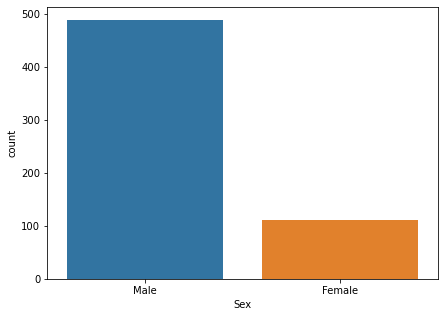

In [8]:
plt.figure(figsize=(7,5))
sns.countplot(data=Loan,x='Sex')

In Our Database there is 480+ Male and 100+ Female are there as per our Interpretation

In [9]:
Loan['Marital_Status'].value_counts()

Yes    398
No     213
Name: Marital_Status, dtype: int64

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

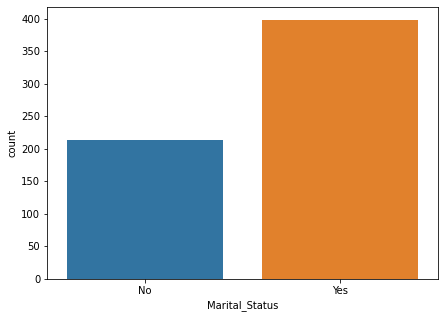

In [10]:
plt.figure(figsize=(7,5))
sns.countplot(data=Loan,x='Marital_Status')

 In our Database 400+ Married Customers and 220+ Unmarried Customers are there

In [11]:
Loan['No_Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: No_Dependents, dtype: int64

<AxesSubplot:xlabel='No_Dependents', ylabel='count'>

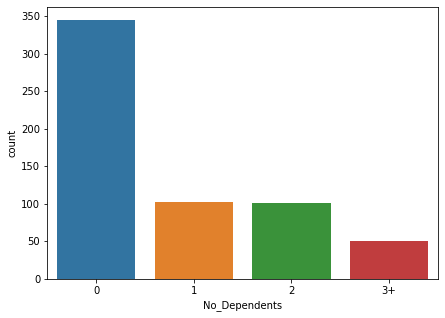

In [12]:
plt.figure(figsize=(7,5))
sns.countplot(data=Loan,x='No_Dependents')

In our Database there are 340 Customers who have no dependents family member and 100 customers who have only one dependents family member and 100 customers who have only two dependents family member and 60+ customers who have more than three dependents family member

In [13]:
Loan['Education_Status'].value_counts()

Graduate        480
Not Graduate    134
Name: Education_Status, dtype: int64

<AxesSubplot:xlabel='Education_Status', ylabel='count'>

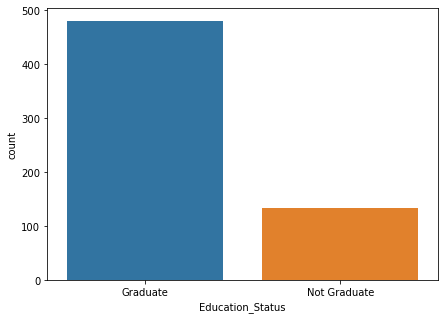

In [14]:
plt.figure(figsize=(7,5))
sns.countplot(data=Loan,x='Education_Status')

#in our database there 480+ Graduaet and 100+ Not Graduate are there

In [15]:
Loan['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

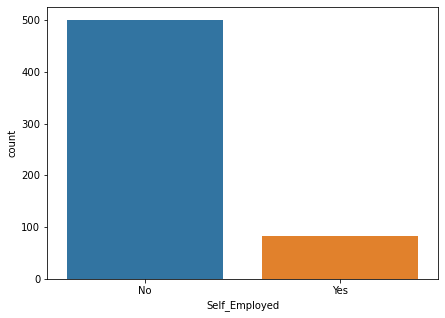

In [16]:
plt.figure(figsize=(7,5))
sns.countplot(data=Loan,x='Self_Employed')

in our Database there is 80+ are Self Employed and 500 are not Self Employed

In [17]:
Loan['Income'].value_counts()

2500    9
6000    6
2600    6
4583    6
4166    5
       ..
5503    1
3450    1
2425    1
2423    1
4095    1
Name: Income, Length: 505, dtype: int64

In [18]:
Loan['Total_Income']=Loan['Income']+Loan['Coapplicant_Income']

In [19]:
Loan['Total_Income_Log']=np.log(Loan['Total_Income'])

<AxesSubplot:xlabel='Total_Income_Log', ylabel='Count'>

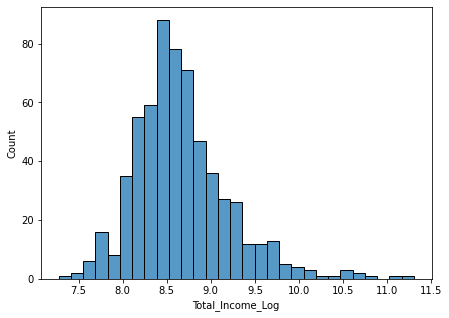

In [20]:
plt.figure(figsize=(7,5))
sns.histplot(data=Loan,x='Total_Income_Log')

in our database Total Income of Customers are between 7.5 thousand and 9.5 thousand 

In [21]:
Loan.drop(['Income','Coapplicant_Income'],axis=1,inplace=True)

In [22]:
Loan['Loan_Amount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
211.0     1
250.0     1
62.0      1
85.0      1
436.0     1
Name: Loan_Amount, Length: 203, dtype: int64

<AxesSubplot:xlabel='Loan_Amount', ylabel='Count'>

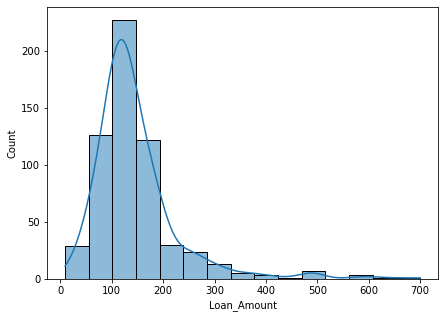

In [23]:
plt.figure(figsize=(7,5))
sns.histplot(Loan['Loan_Amount'],kde=True,bins=15)

in our database Maximum loan amount range is 50 to 200 

In [24]:
Loan['Tenure'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Tenure, dtype: int64

<AxesSubplot:xlabel='Tenure', ylabel='Count'>

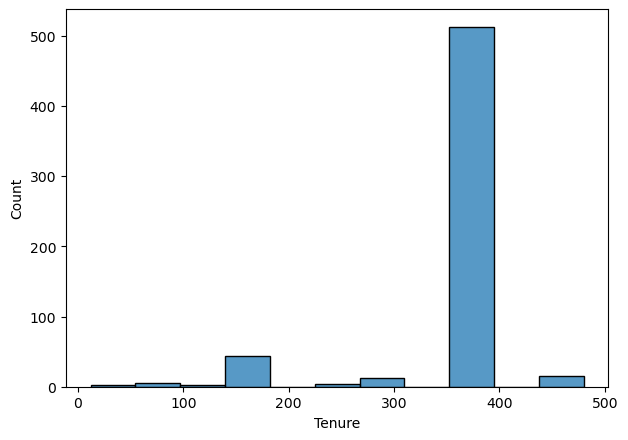

In [25]:
plt.figure(figsize=(7,5),dpi=100)
sns.histplot(Loan['Tenure'])

<AxesSubplot:xlabel='Tenure', ylabel='count'>

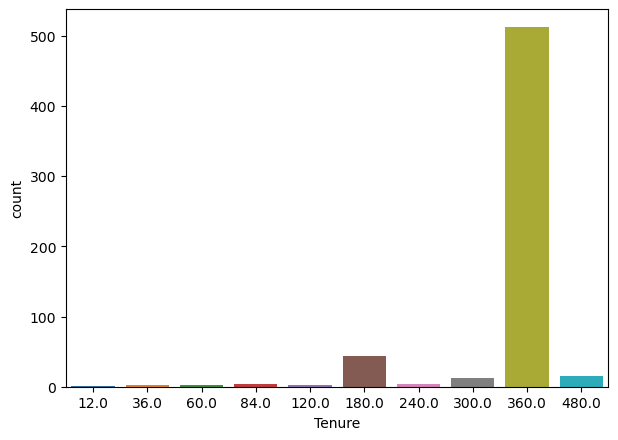

In [26]:
plt.figure(figsize=(7,5),dpi=100)
sns.countplot(data=Loan,x='Tenure')

in our database Most of the Customers taken loan for 360 Months and remaining customers taken loan for 180,480,300....... Months

In [27]:
Loan['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

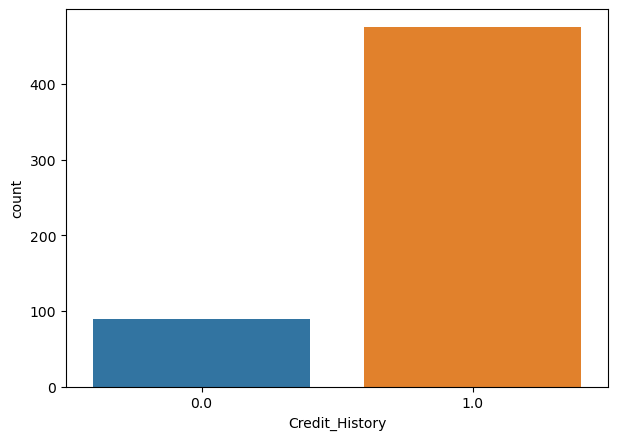

In [28]:
plt.figure(figsize=(7,5),dpi=100)
sns.countplot(data=Loan,x='Credit_History')

in our database 450+ Customers having Good Repayment History and 90+ Customers having Bad Repayment History 

In [29]:
Loan['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

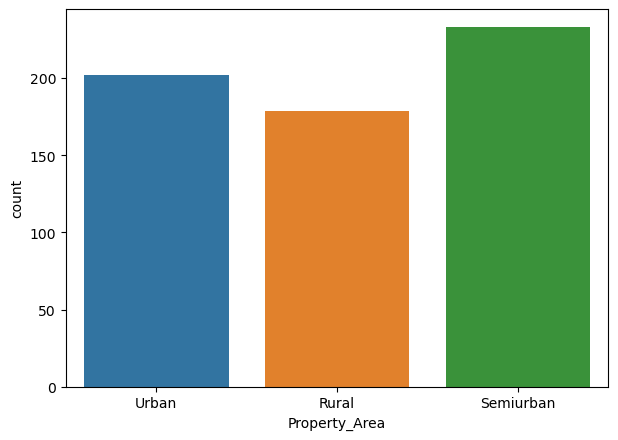

In [30]:
plt.figure(figsize=(7,5),dpi=100)
sns.countplot(data=Loan,x='Property_Area')

in our database 200 Customer are from Urban Area and 180+ Customers are from Rural Area and 200+ Customers are from SemiUrban Area 

In [31]:
Loan['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

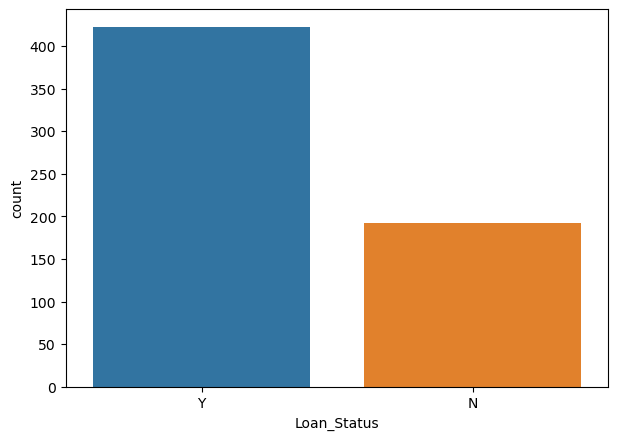

In [32]:
plt.figure(figsize=(7,5),dpi=100)
sns.countplot(data=Loan,x='Loan_Status')

in our database 400+ Customers are taken loan and 200 Customer are not taken loan

# Bivariate Analysis

In [33]:
Loan.columns

Index(['Loan_ID', 'Sex', 'Marital_Status', 'No_Dependents', 'Education_Status',
       'Self_Employed', 'Loan_Amount', 'Tenure', 'Credit_History',
       'Property_Area', 'Loan_Status', 'Total_Income', 'Total_Income_Log'],
      dtype='object')

<AxesSubplot:xlabel='Sex', ylabel='Total_Income_Log'>

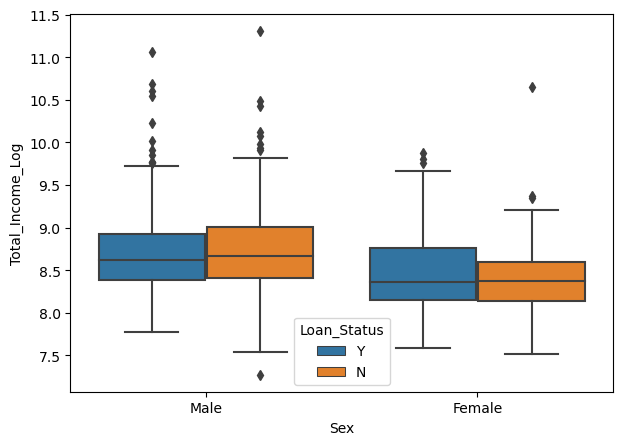

In [34]:
plt.figure(figsize=(7,5),dpi=100)
sns.boxplot(data=Loan,x='Sex',y='Total_Income_Log',hue='Loan_Status')

In our Database all Customer's mean are same but in male 50% customer's taken loan and in Female 75% customer's taken loan

In [35]:
Loan.head()

,Loan_ID,Sex,Marital_Status,No_Dependents,Education_Status,Self_Employed,Loan_Amount,Tenure,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,NaN,360.0,1.0,Urban,Y,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0,8.699515


In [36]:
Loan['Total_Income_Log'].quantile(0.95)

9.690627276154663

In [37]:
def op(Total_Income_Log):
    if Total_Income_Log>9.6:
        return 9.6;
    else:
        return Total_Income_Log

In [38]:
Loan['Total_Income_Log']=Loan['Total_Income_Log'].apply(op)

<AxesSubplot:xlabel='Marital_Status', ylabel='Total_Income_Log'>

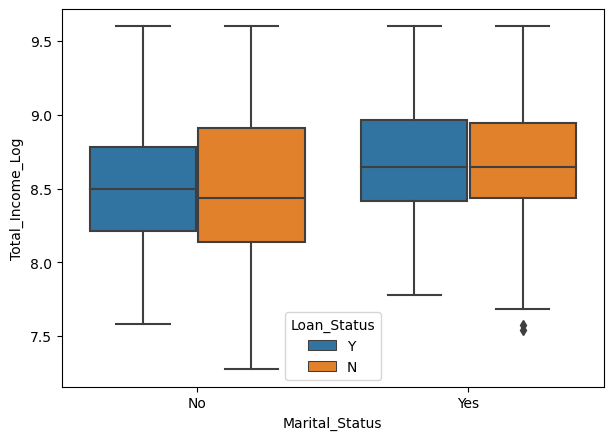

In [39]:
plt.figure(figsize=(7,5),dpi=100)
sns.boxplot(data=Loan,x='Marital_Status',y='Total_Income_Log',hue='Loan_Status')

About 50% of the customer's whose income is between 8000 and 9000 and those customers are unmarried have taken loan
About 50% of the customer's whose income is between 8500 and 9500 and those customers are married have taken loan




<AxesSubplot:xlabel='No_Dependents', ylabel='Total_Income_Log'>

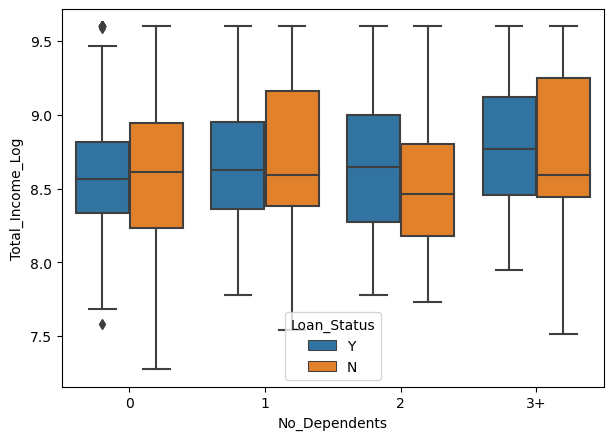

In [40]:
plt.figure(figsize=(7,5),dpi=100)
sns.boxplot(data=Loan,x='No_Dependents',y='Total_Income_Log',hue='Loan_Status')

<AxesSubplot:xlabel='Education_Status', ylabel='Total_Income_Log'>

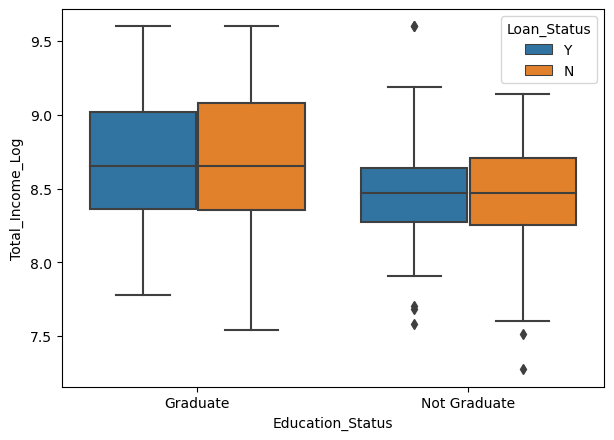

In [41]:
plt.figure(figsize=(7,5),dpi=100)
sns.boxplot(data=Loan,x='Education_Status',y='Total_Income_Log',hue='Loan_Status')

<AxesSubplot:xlabel='Self_Employed', ylabel='Total_Income_Log'>

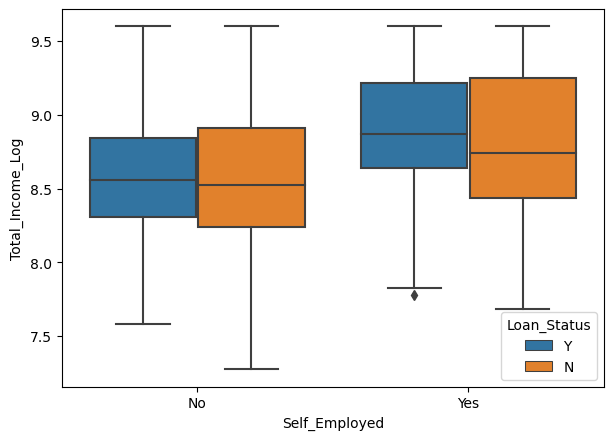

In [42]:
plt.figure(figsize=(7,5),dpi=100)
sns.boxplot(data=Loan,x='Self_Employed',y='Total_Income_Log',hue='Loan_Status')

<AxesSubplot:xlabel='Loan_Amount', ylabel='Total_Income_Log'>

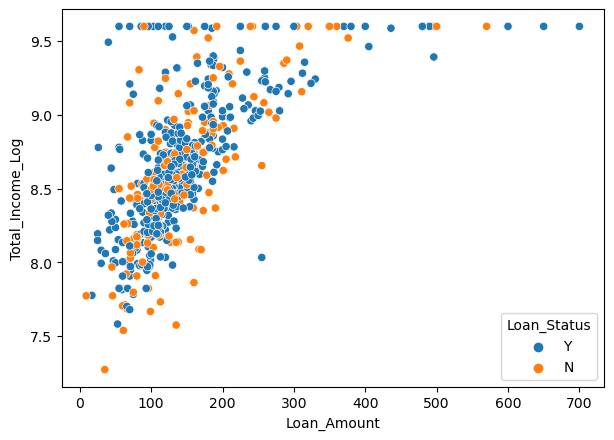

In [43]:
plt.figure(figsize=(7,5),dpi=100)
sns.scatterplot(data=Loan,x='Loan_Amount',y='Total_Income_Log',hue='Loan_Status')

In our database customers whose income is between 7500 and 10000 and they taken loan and their maximum loan amount is up to 350

<AxesSubplot:xlabel='Credit_History', ylabel='Total_Income_Log'>

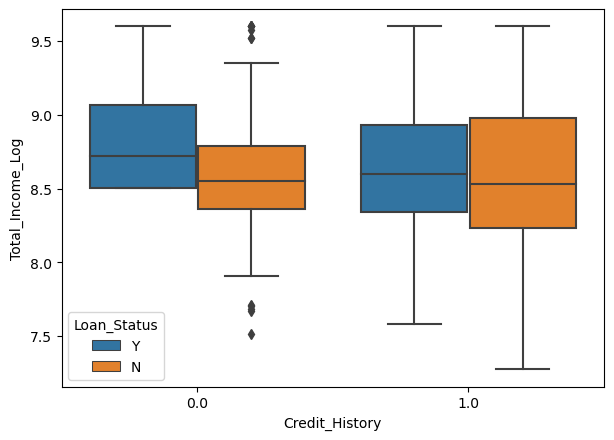

In [44]:
plt.figure(figsize=(7,5),dpi=100)
sns.boxplot(data=Loan,x='Credit_History',y='Total_Income_Log',hue='Loan_Status')

<AxesSubplot:xlabel='Property_Area', ylabel='Total_Income_Log'>

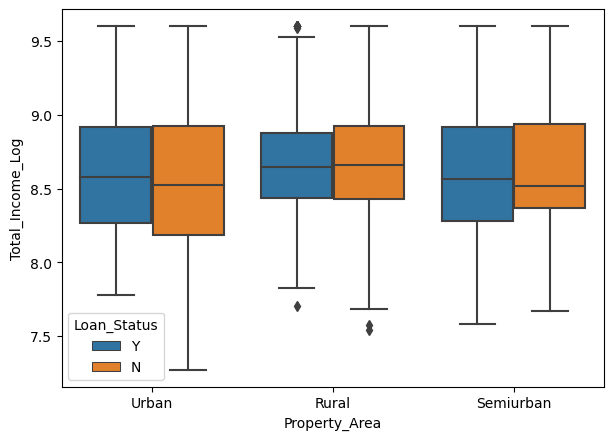

In [45]:
plt.figure(figsize=(7,5),dpi=100)
sns.boxplot(data=Loan,x='Property_Area',y='Total_Income_Log',hue='Loan_Status')

<AxesSubplot:xlabel='Loan_Status', ylabel='Total_Income_Log'>

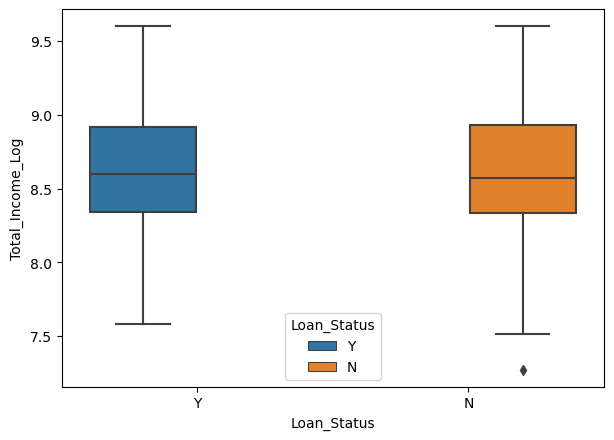

In [46]:
plt.figure(figsize=(7,5),dpi=100)
sns.boxplot(data=Loan,x='Loan_Status',y='Total_Income_Log',hue='Loan_Status')

# Multivariate Analysis

<Figure size 700x500 with 0 Axes>

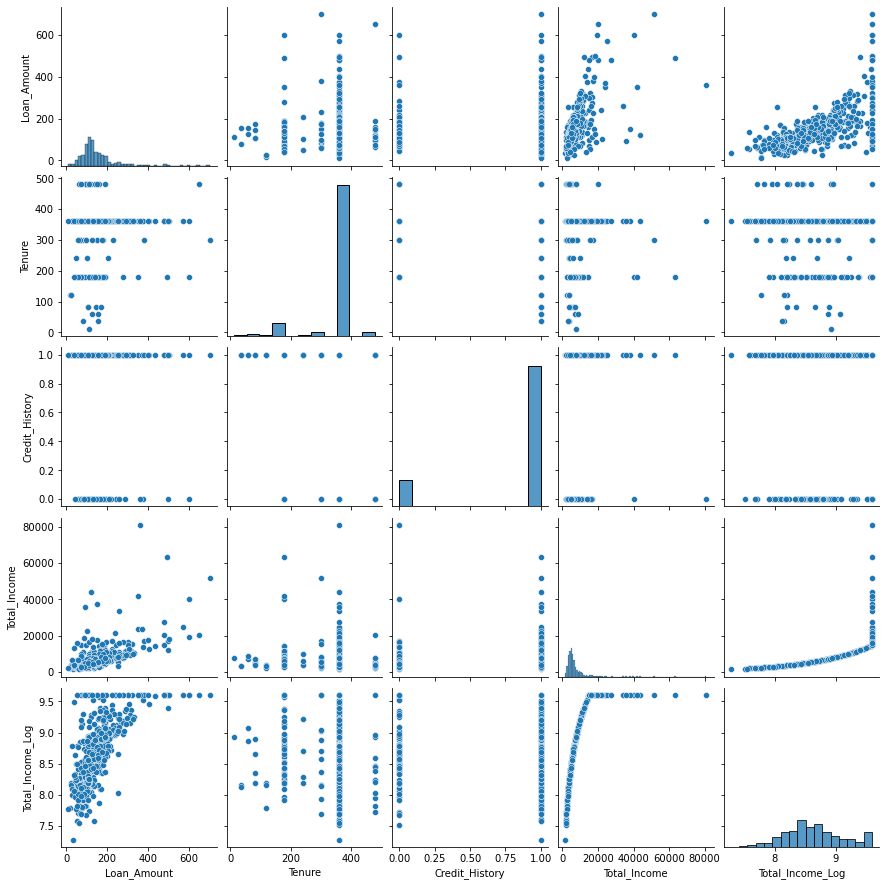

In [47]:
plt.figure(figsize=(7,5),dpi=100)
sns.pairplot(data=Loan)

<Figure size 700x500 with 0 Axes>

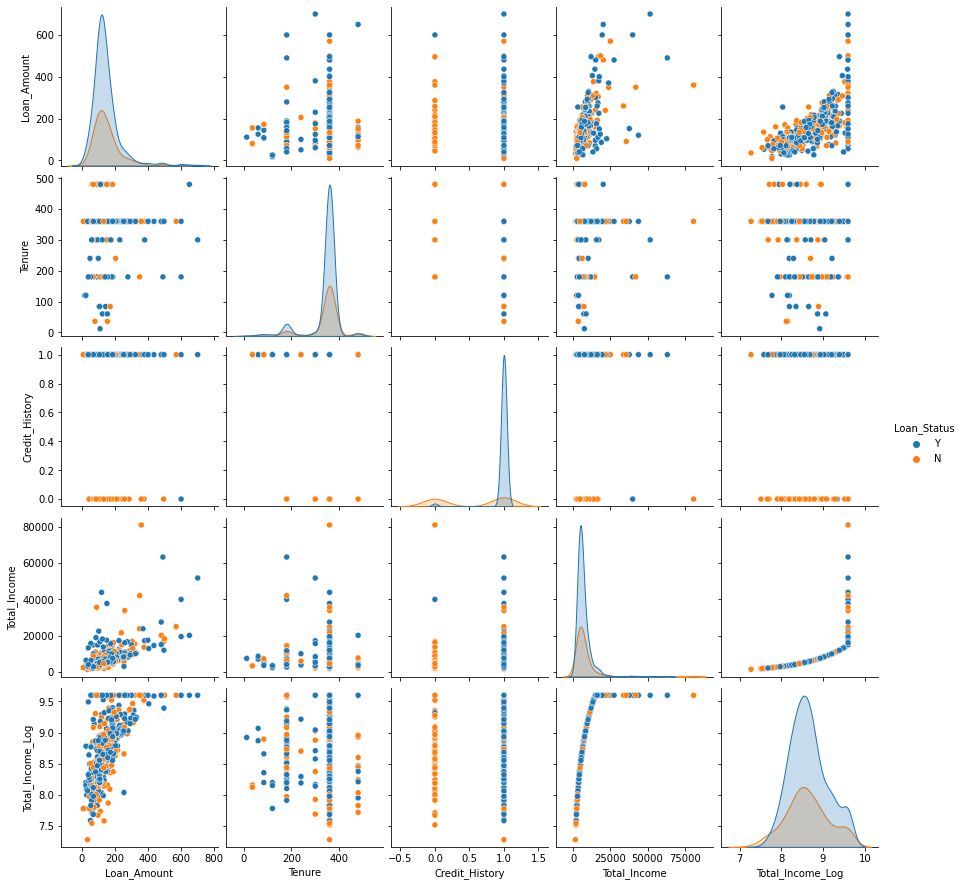

In [48]:
plt.figure(figsize=(7,5),dpi=100)
sns.pairplot(data=Loan,hue='Loan_Status')

<AxesSubplot:>

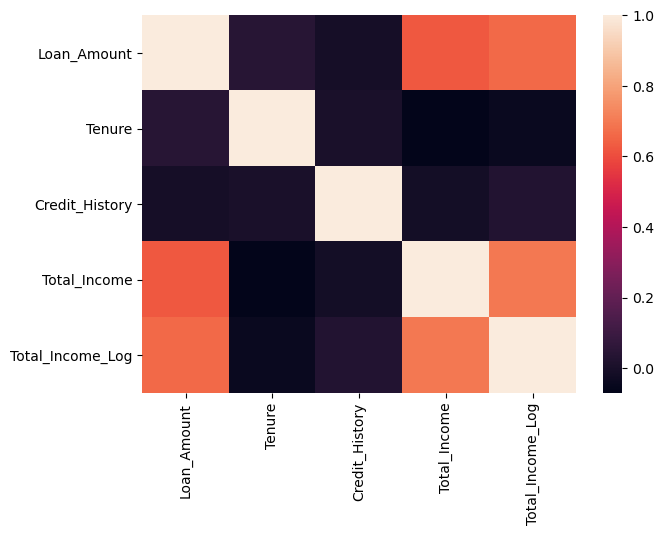

In [49]:
plt.figure(figsize=(7,5),dpi=100)
sns.heatmap(data=Loan.corr())

<AxesSubplot:>

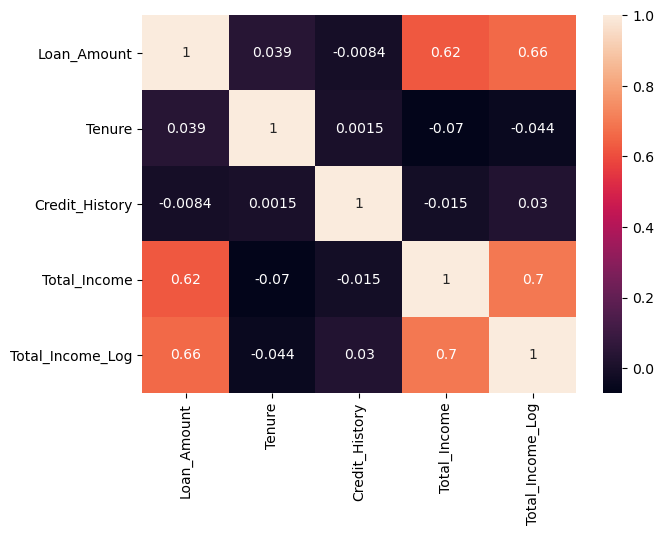

In [50]:
plt.figure(figsize=(7,5),dpi=100)
sns.heatmap(data=Loan.corr(),annot=True)

From above output we can see that the columns are highly correlated to each other 

# Test Data

In [51]:
Loan_t=pd.read_csv("C:\\Users\\Kiran Shinde\\Downloads\\test - test.csv") 

In [52]:
Loan_t.head()

,Loan_ID,Sex,Marital_Status,No_Dependents,Education_Status,Self_Employed,Income,Coapplicant_Income,Loan_Amount,Tenure,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [53]:
Loan_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             367 non-null    object 
 1   Sex                 356 non-null    object 
 2   Marital_Status      367 non-null    object 
 3   No_Dependents       357 non-null    object 
 4   Education_Status    367 non-null    object 
 5   Self_Employed       344 non-null    object 
 6   Income              367 non-null    int64  
 7   Coapplicant_Income  367 non-null    int64  
 8   Loan_Amount         362 non-null    float64
 9   Tenure              361 non-null    float64
 10  Credit_History      338 non-null    float64
 11  Property_Area       367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [54]:
Loan_t.shape

(367, 12)

In [55]:
Loan_t.columns

Index(['Loan_ID', 'Sex', 'Marital_Status', 'No_Dependents', 'Education_Status',
       'Self_Employed', 'Income', 'Coapplicant_Income', 'Loan_Amount',
       'Tenure', 'Credit_History', 'Property_Area'],
      dtype='object')

# Insights

# Univariate analysis

In [56]:
Loan_t['Sex'].value_counts()

Male      286
Female     70
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

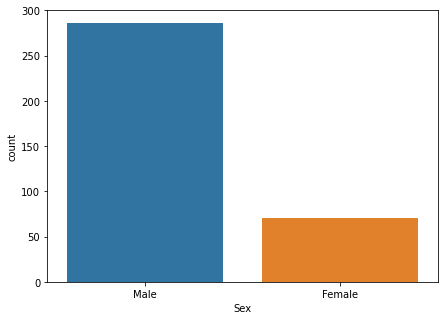

In [57]:
plt.figure(figsize=(7,5))
sns.countplot(data=Loan_t,x='Sex')

About 280+ customers in our database are male and 80+ customers are Female

In [58]:
Loan_t['Marital_Status'].value_counts()

Yes    233
No     134
Name: Marital_Status, dtype: int64

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

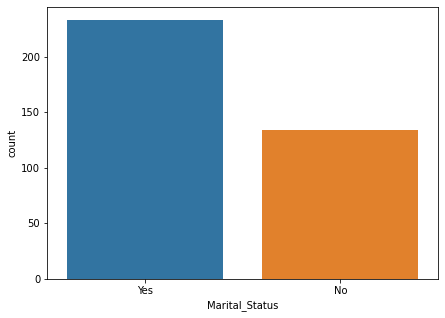

In [59]:
plt.figure(figsize=(7,5))
sns.countplot(data=Loan_t,x='Marital_Status')

About 200+ cusotmers are married and 140 customers are unmarried

In [60]:
Loan_t['No_Dependents'].value_counts()

0     200
2      59
1      58
3+     40
Name: No_Dependents, dtype: int64

<AxesSubplot:xlabel='No_Dependents', ylabel='count'>

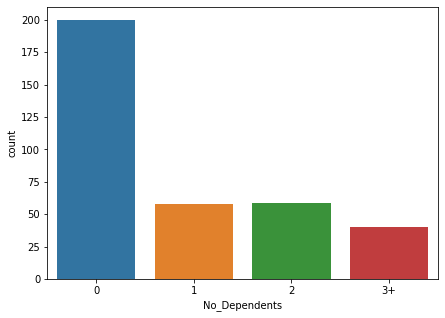

In [61]:
plt.figure(figsize=(7,5))
sns.countplot(data=Loan_t,x='No_Dependents')

In our database 200 customers have no dependent family members, 60 customers have one and two dependents family members and 35+ customers have 3 or more dependent family members

In [62]:
Loan_t['Education_Status'].value_counts()

Graduate        283
Not Graduate     84
Name: Education_Status, dtype: int64

<AxesSubplot:xlabel='Education_Status', ylabel='count'>

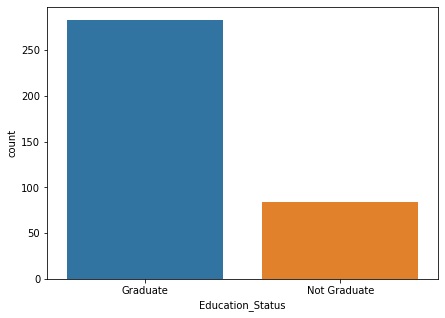

In [63]:
plt.figure(figsize=(7,5))
sns.countplot(data=Loan_t,x='Education_Status')

From above output upto 250+ customers are Graduate and 85 customers are not Graduate

In [64]:
Loan_t['Self_Employed'].value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

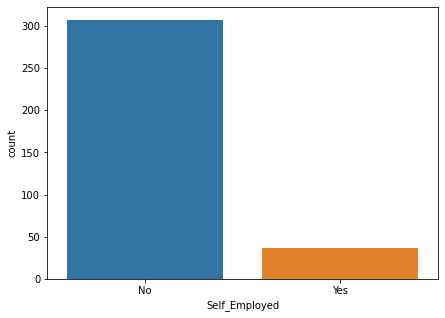

In [65]:
plt.figure(figsize=(7,5))
sns.countplot(data=Loan_t,x='Self_Employed')

In our database 300 customers are not self employed and below 50 customers are self employed

In [66]:
Loan_t['Total_Income']=Loan_t['Income']+Loan_t['Coapplicant_Income']

In [67]:
Loan_t['Total_Income_Log']=np.log(Loan_t['Total_Income'])

<AxesSubplot:xlabel='Total_Income_Log', ylabel='Count'>

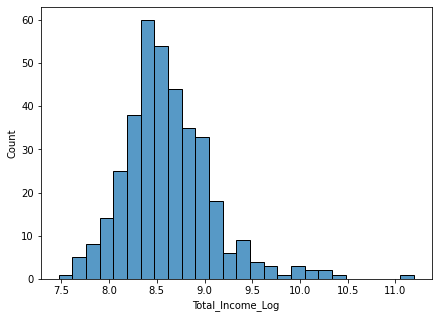

In [68]:
plt.figure(figsize=(7,5))
sns.histplot(data=Loan_t,x='Total_Income_Log')

in our database Total Income of Customers are between 7.5 thousand and 9.5 thousand 

In [69]:
Loan_t.drop(['Income','Coapplicant_Income'],axis=1,inplace=True)

In [70]:
Loan_t['Loan_Amount'].value_counts()

150.0    12
125.0    11
110.0    10
120.0     9
90.0      9
         ..
159.0     1
155.0     1
257.0     1
112.0     1
234.0     1
Name: Loan_Amount, Length: 144, dtype: int64

<AxesSubplot:xlabel='Loan_Amount', ylabel='Count'>

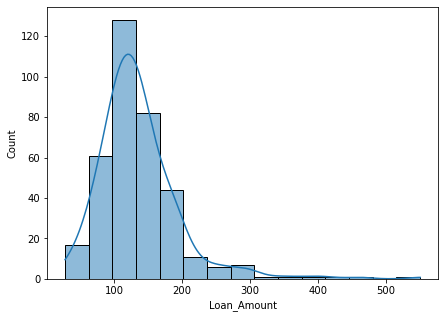

In [71]:
plt.figure(figsize=(7,5))
sns.histplot(Loan_t['Loan_Amount'],kde=True,bins=15)

in our database Maximum loan amount range is 50 to 200 

In [72]:
Loan_t['Tenure'].value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
350.0      1
12.0       1
36.0       1
120.0      1
60.0       1
6.0        1
Name: Tenure, dtype: int64

<AxesSubplot:xlabel='Tenure', ylabel='Count'>

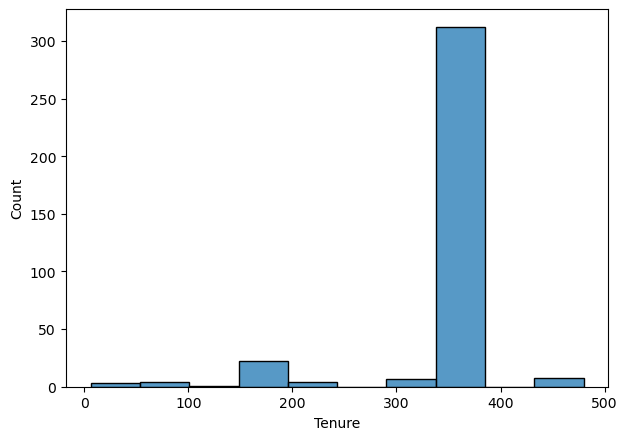

In [73]:
plt.figure(figsize=(7,5),dpi=100)
sns.histplot(Loan_t['Tenure'])

In [74]:
Loan_t['Credit_History'].value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

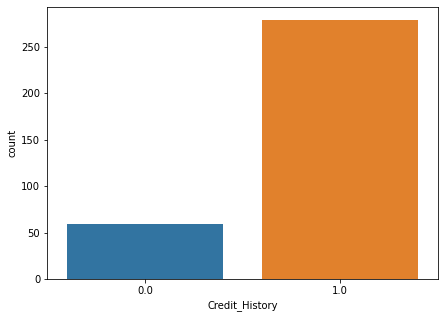

In [75]:
plt.figure(figsize=(7,5))
sns.countplot(data=Loan_t,x='Credit_History')

In our Database 250+ have good Credit history and 50+ customers have bad credit History 

In [76]:
Loan_t['Property_Area'].value_counts()

Urban        140
Semiurban    116
Rural        111
Name: Property_Area, dtype: int64

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

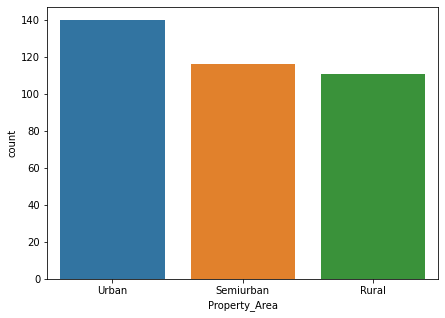

In [77]:
plt.figure(figsize=(7,5))
sns.countplot(data=Loan_t,x='Property_Area')

in our database 140 Customer are from Urban Area and 115 Customers are from Semiurban Area and 110 Customers are from Rural Area 

# Bivariate Analysis

In [78]:
Loan_t.columns

Index(['Loan_ID', 'Sex', 'Marital_Status', 'No_Dependents', 'Education_Status',
       'Self_Employed', 'Loan_Amount', 'Tenure', 'Credit_History',
       'Property_Area', 'Total_Income', 'Total_Income_Log'],
      dtype='object')

In [79]:
Loan_t['Total_Income_Log'].quantile(0.95)

9.454884567256068

In [80]:
def A(Total_Income_Log):
    if Total_Income_Log>9.4:
        return 9.4;
    else:
        return Total_Income_Log

In [81]:
Loan_t['Total_Income_Log']=Loan_t['Total_Income_Log'].apply(A)

<AxesSubplot:xlabel='Sex', ylabel='Total_Income_Log'>

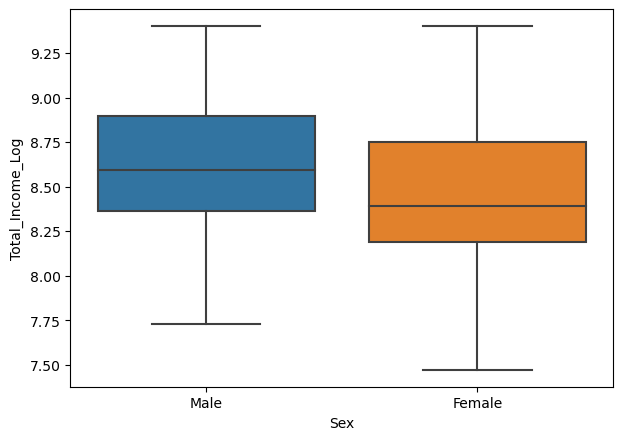

In [82]:
plt.figure(figsize=(7,5),dpi=100)
sns.boxplot(data=Loan_t,x='Sex',y='Total_Income_Log')

<AxesSubplot:xlabel='Marital_Status', ylabel='Total_Income_Log'>

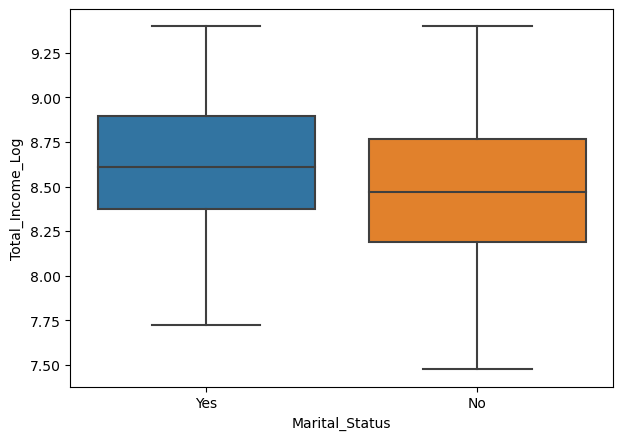

In [83]:
plt.figure(figsize=(7,5),dpi=100)
sns.boxplot(data=Loan_t,x='Marital_Status',y='Total_Income_Log')

<AxesSubplot:xlabel='No_Dependents', ylabel='Total_Income_Log'>

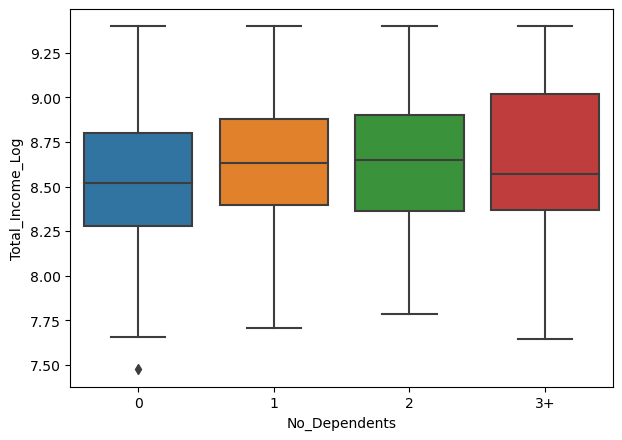

In [84]:
plt.figure(figsize=(7,5),dpi=100)
sns.boxplot(data=Loan_t,x='No_Dependents',y='Total_Income_Log')

<AxesSubplot:xlabel='Education_Status', ylabel='Total_Income_Log'>

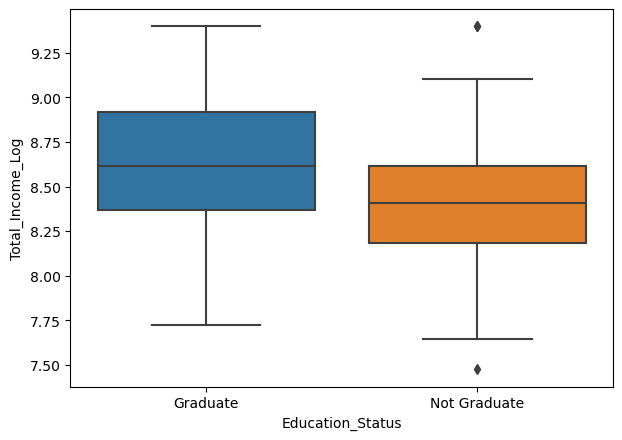

In [85]:
plt.figure(figsize=(7,5),dpi=100)
sns.boxplot(data=Loan_t,x='Education_Status',y='Total_Income_Log')

<AxesSubplot:xlabel='Self_Employed', ylabel='Total_Income_Log'>

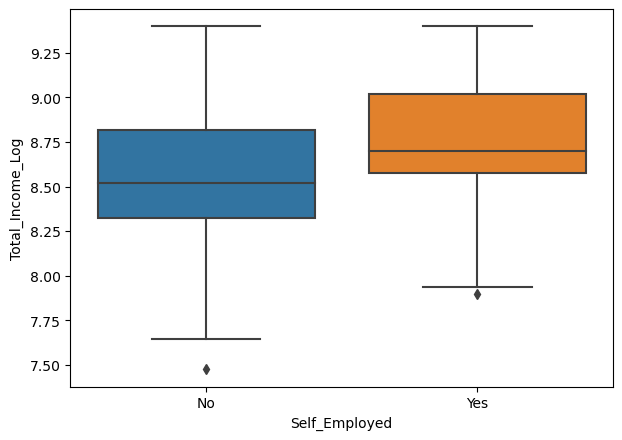

In [86]:
plt.figure(figsize=(7,5),dpi=100)
sns.boxplot(data=Loan_t,x='Self_Employed',y='Total_Income_Log')

<AxesSubplot:xlabel='Loan_Amount', ylabel='Total_Income_Log'>

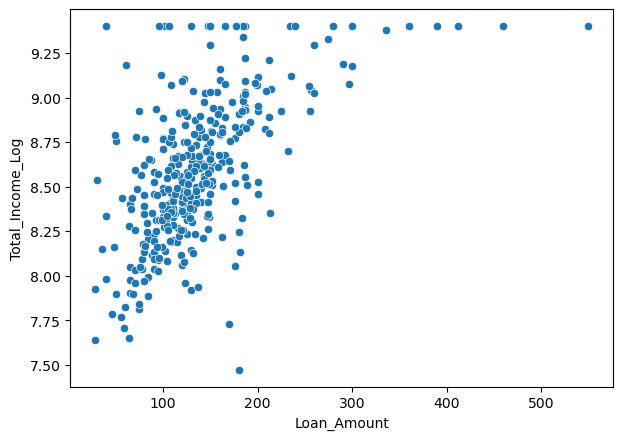

In [87]:
plt.figure(figsize=(7,5),dpi=100)
sns.scatterplot(data=Loan_t,x='Loan_Amount',y='Total_Income_Log')

<AxesSubplot:xlabel='Credit_History', ylabel='Total_Income_Log'>

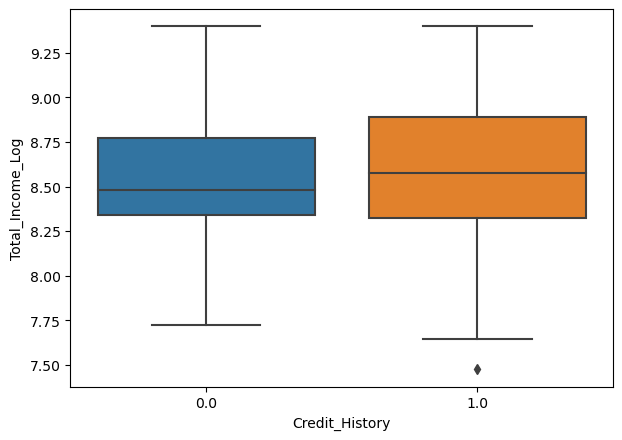

In [88]:
plt.figure(figsize=(7,5),dpi=100)
sns.boxplot(data=Loan_t,x='Credit_History',y='Total_Income_Log')

<AxesSubplot:xlabel='Property_Area', ylabel='Total_Income_Log'>

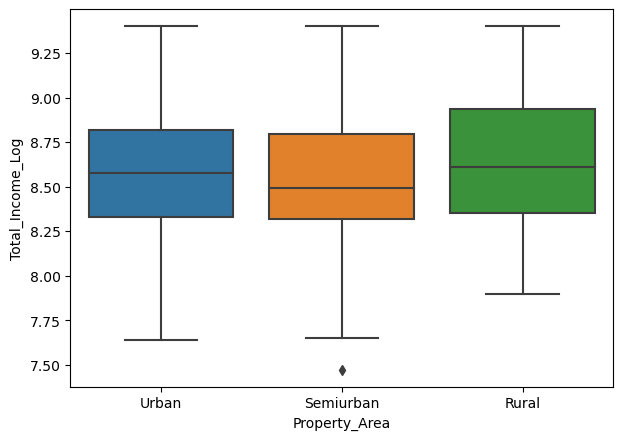

In [89]:
plt.figure(figsize=(7,5),dpi=100)
sns.boxplot(data=Loan_t,x='Property_Area',y='Total_Income_Log')

# Multivariate Analysis

<Figure size 700x500 with 0 Axes>

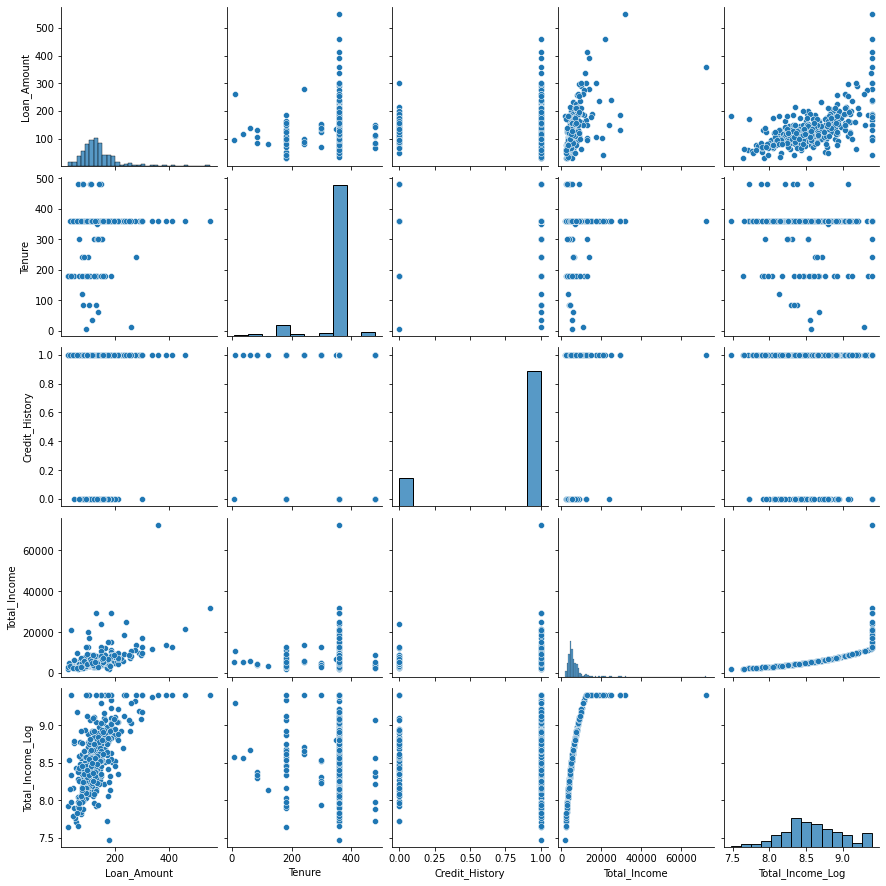

In [90]:
plt.figure(figsize=(7,5),dpi=100)
sns.pairplot(data=Loan_t)

<AxesSubplot:>

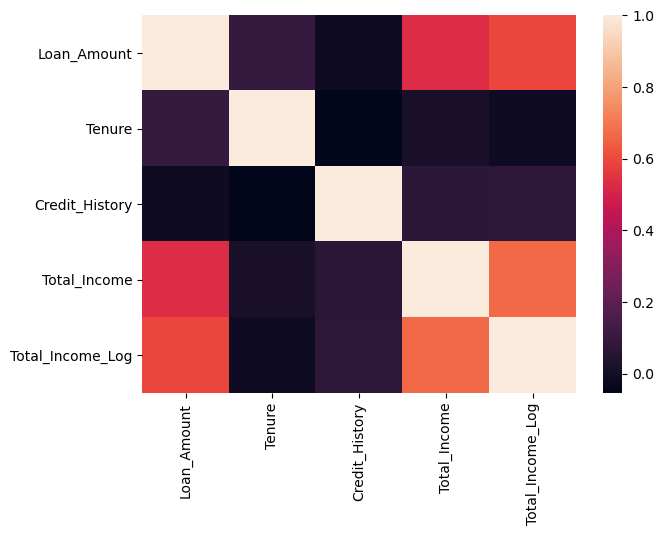

In [91]:
plt.figure(figsize=(7,5),dpi=100)
sns.heatmap(data=Loan_t.corr())

<AxesSubplot:>

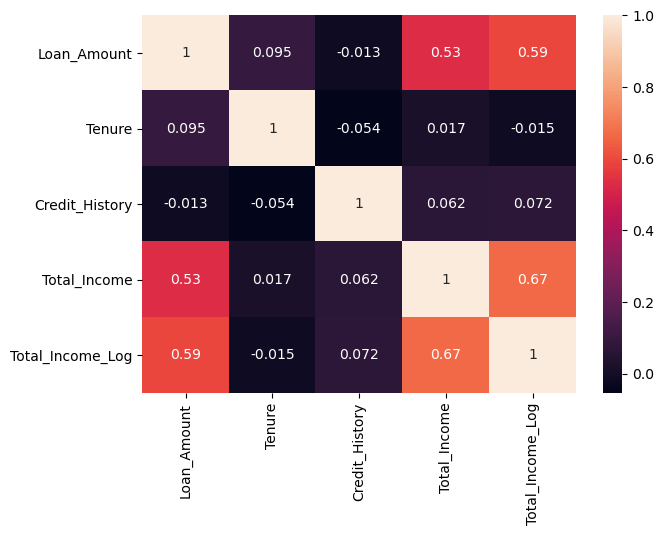

In [92]:
plt.figure(figsize=(7,5),dpi=100)
sns.heatmap(data=Loan_t.corr(),annot=True)


# Data Preprocessing

In [93]:
Loan.head() #for review our top 5 train Data

,Loan_ID,Sex,Marital_Status,No_Dependents,Education_Status,Self_Employed,Loan_Amount,Tenure,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,NaN,360.0,1.0,Urban,Y,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0,8.699515


In [94]:
Loan.shape #to see shape of our Train Data

(614, 13)

In [95]:
Loan.columns #to see Columns of our Train Data

Index(['Loan_ID', 'Sex', 'Marital_Status', 'No_Dependents', 'Education_Status',
       'Self_Employed', 'Loan_Amount', 'Tenure', 'Credit_History',
       'Property_Area', 'Loan_Status', 'Total_Income', 'Total_Income_Log'],
      dtype='object')

In [96]:
Loan.info() #to see information (DataType, No of Columns, Columns Number) of our Train Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Loan_ID           614 non-null    object 
 1   Sex               601 non-null    object 
 2   Marital_Status    611 non-null    object 
 3   No_Dependents     599 non-null    object 
 4   Education_Status  614 non-null    object 
 5   Self_Employed     582 non-null    object 
 6   Loan_Amount       592 non-null    float64
 7   Tenure            600 non-null    float64
 8   Credit_History    564 non-null    float64
 9   Property_Area     614 non-null    object 
 10  Loan_Status       614 non-null    object 
 11  Total_Income      614 non-null    float64
 12  Total_Income_Log  614 non-null    float64
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [97]:
Loan['EMI']=Loan['Tenure']/Loan['Loan_Amount'] #Creating new column from given columns

In [98]:
Loan.head()

,Loan_ID,Sex,Marital_Status,No_Dependents,Education_Status,Self_Employed,Loan_Amount,Tenure,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_Log,EMI
0,LP001002,Male,No,0,Graduate,No,NaN,360.0,1.0,Urban,Y,5849.0,8.674026,NaN
1,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0,8.714568,2.812500
2,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0,8.006368,5.454545
3,LP001006,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0,8.505323,3.000000
4,LP001008,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0,8.699515,2.553191


In [99]:
Loan['Balance']=Loan['Total_Income']-Loan['EMI'] 

In [100]:
Loan.head()

,Loan_ID,Sex,Marital_Status,No_Dependents,Education_Status,Self_Employed,Loan_Amount,Tenure,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_Log,EMI,Balance
0,LP001002,Male,No,0,Graduate,No,NaN,360.0,1.0,Urban,Y,5849.0,8.674026,NaN,NaN
1,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0,8.714568,2.812500,6088.187500
2,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0,8.006368,5.454545,2994.545455
3,LP001006,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0,8.505323,3.000000,4938.000000
4,LP001008,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0,8.699515,2.553191,5997.446809


In [101]:
Loan.isna().sum()  #For checking NA values counts

Loan_ID              0
Sex                 13
Marital_Status       3
No_Dependents       15
Education_Status     0
Self_Employed       32
Loan_Amount         22
Tenure              14
Credit_History      50
Property_Area        0
Loan_Status          0
Total_Income         0
Total_Income_Log     0
EMI                 36
Balance             36
dtype: int64

In [102]:
Loan.fillna(Loan.mean(),inplace=True) #Filling NA Values with mean()

In [103]:
Loan.isna().sum() 

Loan_ID              0
Sex                 13
Marital_Status       3
No_Dependents       15
Education_Status     0
Self_Employed       32
Loan_Amount          0
Tenure               0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
Total_Income_Log     0
EMI                  0
Balance              0
dtype: int64

In [104]:
Loan['Sex'].value_counts() #Counting Unique values in Columns 

Male      489
Female    112
Name: Sex, dtype: int64

In [105]:
Loan['Sex'].fillna('Male',inplace=True) 

In [106]:
Loan['No_Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: No_Dependents, dtype: int64

In [107]:
Loan['No_Dependents'].fillna(0,inplace=True)

In [108]:
Loan['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [109]:
Loan['Self_Employed'].fillna('No',inplace=True)

In [110]:
Loan['Marital_Status'].value_counts()

Yes    398
No     213
Name: Marital_Status, dtype: int64

In [111]:
Loan['Marital_Status'].fillna('Yes',inplace=True)

In [112]:
Loan.isna().sum()

Loan_ID             0
Sex                 0
Marital_Status      0
No_Dependents       0
Education_Status    0
Self_Employed       0
Loan_Amount         0
Tenure              0
Credit_History      0
Property_Area       0
Loan_Status         0
Total_Income        0
Total_Income_Log    0
EMI                 0
Balance             0
dtype: int64

# Logistic Regression Without Scaling

In [113]:
a=Loan.drop(['Loan_Status','Loan_ID'],axis=1) #Droping useless Data from Dataset

In [114]:
a.head()

,Sex,Marital_Status,No_Dependents,Education_Status,Self_Employed,Loan_Amount,Tenure,Credit_History,Property_Area,Total_Income,Total_Income_Log,EMI,Balance
0,Male,No,0,Graduate,No,146.412162,360.0,1.0,Urban,5849.0,8.674026,3.004757,7072.616212
1,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,6091.0,8.714568,2.812500,6088.187500
2,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,3000.0,8.006368,5.454545,2994.545455
3,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,4941.0,8.505323,3.000000,4938.000000
4,Male,No,0,Graduate,No,141.000000,360.0,1.0,Urban,6000.0,8.699515,2.553191,5997.446809


In [115]:
b=Loan['Loan_Status'] #Defining column name

In [116]:
b.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [117]:
a=pd.get_dummies(a,drop_first=True) #Converting Categorical data into binary number

In [118]:
a.head()

,Loan_Amount,Tenure,Credit_History,Total_Income,Total_Income_Log,EMI,Balance,Sex_Male,Marital_Status_Yes,No_Dependents_0,No_Dependents_1,No_Dependents_2,No_Dependents_3+,Education_Status_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,146.412162,360.0,1.0,5849.0,8.674026,3.004757,7072.616212,1,0,1,0,0,0,0,0,0,1
1,128.000000,360.0,1.0,6091.0,8.714568,2.812500,6088.187500,1,1,0,1,0,0,0,0,0,0
2,66.000000,360.0,1.0,3000.0,8.006368,5.454545,2994.545455,1,1,1,0,0,0,0,1,0,1
3,120.000000,360.0,1.0,4941.0,8.505323,3.000000,4938.000000,1,1,1,0,0,0,1,0,0,1
4,141.000000,360.0,1.0,6000.0,8.699515,2.553191,5997.446809,1,0,1,0,0,0,0,0,0,1


In [119]:
from sklearn.model_selection import train_test_split #Spiliting Data into Train data and test Data

In [120]:
x_train,x_val,y_train,y_val=train_test_split(a,b,test_size=0.3) 

In [121]:
print(x_train.shape,y_train.shape) #Checking Shape of Train Data 

(429, 17) (429,)


In [122]:
print(x_val.shape,y_val.shape) #Checking Shape of Test Data

(185, 17) (185,)


In [123]:
from sklearn.linear_model import LogisticRegression #Importing Logistic Regression from Sklearn

In [124]:
log_reg=LogisticRegression() #Defining Logistic Regression

In [125]:
log_reg.fit(x_train,y_train) #Fitting logistic Regression (x_train, y_train)

LogisticRegression()

In [126]:
y_pred=log_reg.predict(x_val) #x_val predicting what will be the y_pred

In [127]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix 

In [128]:
accuracy_score(y_val,y_pred) #giving Accuracy_score of our model

0.772972972972973

In [129]:
print(classification_report(y_val,y_pred)) #Classification_report our model

              precision    recall  f1-score   support

           N       0.75      0.41      0.53        58
           Y       0.78      0.94      0.85       127

    accuracy                           0.77       185
   macro avg       0.76      0.68      0.69       185
weighted avg       0.77      0.77      0.75       185



In [130]:
confusion_matrix(y_pred,y_val) #showing Confusion Matrix

array([[ 24,   8],
       [ 34, 119]], dtype=int64)

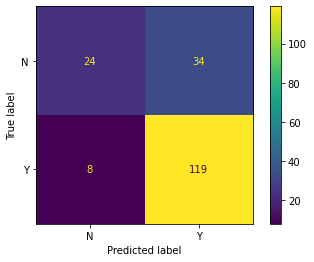

In [131]:
plot_confusion_matrix(log_reg,x_val,y_val) #Plotting Confusion matrix 

In [132]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

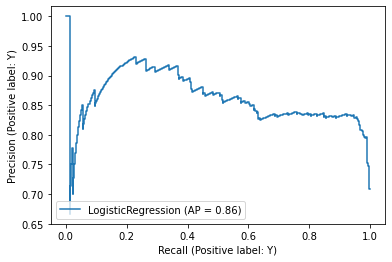

In [133]:
plot_precision_recall_curve(log_reg,x_train,y_train) #plotting graph 

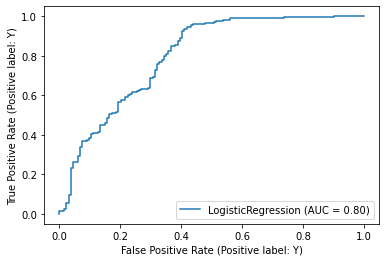

In [134]:
plot_roc_curve(log_reg,x_train,y_train) #plotting graph of ROC Curve

# Logistic Regression With Scaling

In [135]:
c=Loan.drop(['Loan_Status','Loan_ID'],axis=1)

In [136]:
d=Loan['Loan_Status']

In [137]:
c.head()

,Sex,Marital_Status,No_Dependents,Education_Status,Self_Employed,Loan_Amount,Tenure,Credit_History,Property_Area,Total_Income,Total_Income_Log,EMI,Balance
0,Male,No,0,Graduate,No,146.412162,360.0,1.0,Urban,5849.0,8.674026,3.004757,7072.616212
1,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,6091.0,8.714568,2.812500,6088.187500
2,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,3000.0,8.006368,5.454545,2994.545455
3,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,4941.0,8.505323,3.000000,4938.000000
4,Male,No,0,Graduate,No,141.000000,360.0,1.0,Urban,6000.0,8.699515,2.553191,5997.446809


In [138]:
d.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [139]:
c=pd.get_dummies(c,drop_first=True)

In [140]:
c.head()

,Loan_Amount,Tenure,Credit_History,Total_Income,Total_Income_Log,EMI,Balance,Sex_Male,Marital_Status_Yes,No_Dependents_0,No_Dependents_1,No_Dependents_2,No_Dependents_3+,Education_Status_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,146.412162,360.0,1.0,5849.0,8.674026,3.004757,7072.616212,1,0,1,0,0,0,0,0,0,1
1,128.000000,360.0,1.0,6091.0,8.714568,2.812500,6088.187500,1,1,0,1,0,0,0,0,0,0
2,66.000000,360.0,1.0,3000.0,8.006368,5.454545,2994.545455,1,1,1,0,0,0,0,1,0,1
3,120.000000,360.0,1.0,4941.0,8.505323,3.000000,4938.000000,1,1,1,0,0,0,1,0,0,1
4,141.000000,360.0,1.0,6000.0,8.699515,2.553191,5997.446809,1,0,1,0,0,0,0,0,0,1


In [141]:
from sklearn.preprocessing import StandardScaler

In [142]:
Std=StandardScaler()

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
c_train,c_val,d_train,d_val=train_test_split(c,d,test_size=0.3)

In [145]:
print(c_train.shape,y_train.shape)

(429, 17) (429,)


In [146]:
print(c_val.shape,d_val.shape)

(185, 17) (185,)


In [147]:
Std_c_train=Std.fit_transform(c_train)
Std_c_val=Std.fit_transform(c_val)

In [148]:
from sklearn.linear_model import LogisticRegression

In [149]:
Log_reg=LogisticRegression()

In [150]:
Log_reg.fit(Std_c_train,d_train)

LogisticRegression()

In [151]:
d_pred=Log_reg.predict(Std_c_val)

In [152]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix

In [153]:
accuracy_score(d_val,d_pred)

0.8594594594594595

In [154]:
print(classification_report(d_val,d_pred))

              precision    recall  f1-score   support

           N       0.85      0.58      0.69        50
           Y       0.86      0.96      0.91       135

    accuracy                           0.86       185
   macro avg       0.86      0.77      0.80       185
weighted avg       0.86      0.86      0.85       185



In [155]:
confusion_matrix(d_val,d_pred)

array([[ 29,  21],
       [  5, 130]], dtype=int64)

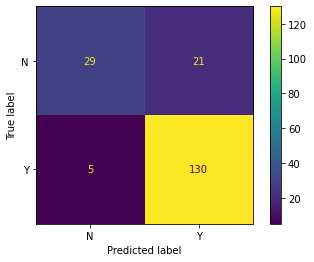

In [156]:
plot_confusion_matrix(Log_reg,Std_c_val,d_val)

In [157]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve,precision_recall_curve

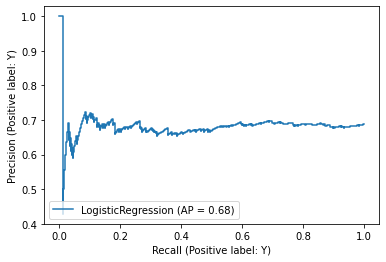

In [158]:
plot_precision_recall_curve(Log_reg,Std_c_train,y_train)

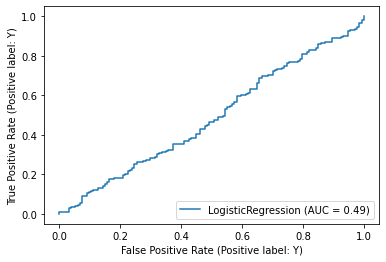

In [159]:
plot_roc_curve(Log_reg,Std_c_train,y_train)

# Cross Validation

In [160]:
from sklearn.model_selection import cross_val_score

In [161]:
cv=KFold(n_splits=7)

In [162]:
cross_val=cross_val_score(Log_reg,c,d,scoring='accuracy',cv=cv).mean()

In [163]:
cross_val

0.7701895805344081

# Decision Tree 

In [164]:
Loan.head()

,Loan_ID,Sex,Marital_Status,No_Dependents,Education_Status,Self_Employed,Loan_Amount,Tenure,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_Log,EMI,Balance
0,LP001002,Male,No,0,Graduate,No,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,3.004757,7072.616212
1,LP001003,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,N,6091.0,8.714568,2.812500,6088.187500
2,LP001005,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,5.454545,2994.545455
3,LP001006,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,Y,4941.0,8.505323,3.000000,4938.000000
4,LP001008,Male,No,0,Graduate,No,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,2.553191,5997.446809


In [165]:
Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Loan_ID           614 non-null    object 
 1   Sex               614 non-null    object 
 2   Marital_Status    614 non-null    object 
 3   No_Dependents     614 non-null    object 
 4   Education_Status  614 non-null    object 
 5   Self_Employed     614 non-null    object 
 6   Loan_Amount       614 non-null    float64
 7   Tenure            614 non-null    float64
 8   Credit_History    614 non-null    float64
 9   Property_Area     614 non-null    object 
 10  Loan_Status       614 non-null    object 
 11  Total_Income      614 non-null    float64
 12  Total_Income_Log  614 non-null    float64
 13  EMI               614 non-null    float64
 14  Balance           614 non-null    float64
dtypes: float64(7), object(8)
memory usage: 72.1+ KB


In [166]:
Loan.describe()

,Loan_Amount,Tenure,Credit_History,Total_Income,Total_Income_Log,EMI,Balance
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,146.412162,342.000000,0.842199,7024.705081,8.642390,3.004757,7072.616212
std,84.037468,64.372489,0.349681,6458.663872,0.471748,2.171744,6401.430983
min,9.000000,12.000000,0.000000,1442.000000,7.273786,0.108108,1431.714286
25%,100.250000,360.000000,1.000000,4166.000000,8.334712,2.000000,4243.534615
50%,129.000000,360.000000,1.000000,5416.500000,8.597205,2.812500,5559.771144
75%,164.750000,360.000000,1.000000,7521.750000,8.925549,3.428571,7248.195652
max,700.000000,480.000000,1.000000,81000.000000,9.600000,40.000000,80999.000000


In [167]:
Loan.columns

Index(['Loan_ID', 'Sex', 'Marital_Status', 'No_Dependents', 'Education_Status',
       'Self_Employed', 'Loan_Amount', 'Tenure', 'Credit_History',
       'Property_Area', 'Loan_Status', 'Total_Income', 'Total_Income_Log',
       'EMI', 'Balance'],
      dtype='object')

In [168]:
e=Loan.drop(['Loan_Status','Loan_ID'],axis=1)

In [169]:
f=Loan['Loan_Status']

In [170]:
e.head()

,Sex,Marital_Status,No_Dependents,Education_Status,Self_Employed,Loan_Amount,Tenure,Credit_History,Property_Area,Total_Income,Total_Income_Log,EMI,Balance
0,Male,No,0,Graduate,No,146.412162,360.0,1.0,Urban,5849.0,8.674026,3.004757,7072.616212
1,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,6091.0,8.714568,2.812500,6088.187500
2,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,3000.0,8.006368,5.454545,2994.545455
3,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,4941.0,8.505323,3.000000,4938.000000
4,Male,No,0,Graduate,No,141.000000,360.0,1.0,Urban,6000.0,8.699515,2.553191,5997.446809


In [171]:
f.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [172]:
e=pd.get_dummies(e,drop_first=True)

In [173]:
e.head()

,Loan_Amount,Tenure,Credit_History,Total_Income,Total_Income_Log,EMI,Balance,Sex_Male,Marital_Status_Yes,No_Dependents_0,No_Dependents_1,No_Dependents_2,No_Dependents_3+,Education_Status_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,146.412162,360.0,1.0,5849.0,8.674026,3.004757,7072.616212,1,0,1,0,0,0,0,0,0,1
1,128.000000,360.0,1.0,6091.0,8.714568,2.812500,6088.187500,1,1,0,1,0,0,0,0,0,0
2,66.000000,360.0,1.0,3000.0,8.006368,5.454545,2994.545455,1,1,1,0,0,0,0,1,0,1
3,120.000000,360.0,1.0,4941.0,8.505323,3.000000,4938.000000,1,1,1,0,0,0,1,0,0,1
4,141.000000,360.0,1.0,6000.0,8.699515,2.553191,5997.446809,1,0,1,0,0,0,0,0,0,1


In [174]:
from sklearn.model_selection import train_test_split

In [175]:
e_train,e_val,f_train,f_val=train_test_split(e,f,test_size=0.3)

In [176]:
print(e_train.shape,f_train.shape)

(429, 17) (429,)


In [177]:
print(e_val.shape,f_val.shape)

(185, 17) (185,)


In [178]:
from sklearn.tree import DecisionTreeClassifier

In [179]:
Dec=DecisionTreeClassifier()

In [180]:
Dec.fit(e_train,f_train)

DecisionTreeClassifier()

In [181]:
f_pred=Dec.predict(e_val)

In [182]:
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix,confusion_matrix

In [183]:
accuracy_score(f_val,f_pred)

0.6648648648648648

In [184]:
print(classification_report(f_val,f_pred))

              precision    recall  f1-score   support

           N       0.41      0.56      0.47        50
           Y       0.81      0.70      0.75       135

    accuracy                           0.66       185
   macro avg       0.61      0.63      0.61       185
weighted avg       0.70      0.66      0.68       185



In [185]:
confusion_matrix(f_val,f_pred)

array([[28, 22],
       [40, 95]], dtype=int64)

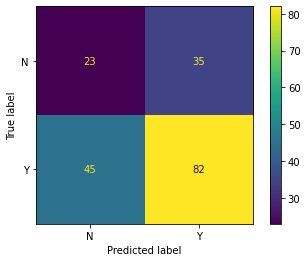

In [186]:
plot_confusion_matrix(Dec,e_val,y_val)

In [187]:
Dec.feature_importances_

array([0.10086404, 0.04759067, 0.29787397, 0.08516846, 0.05312601,
       0.13017172, 0.13984222, 0.02165557, 0.01052657, 0.00701772,
       0.01743633, 0.        , 0.00877215, 0.04057007, 0.01743029,
       0.02195423, 0.        ])

In [188]:
pd.DataFrame(index=e.columns,data=Dec.feature_importances_,columns=['Feature Importance'])

,Feature Importance
Loan_Amount,0.100864
Tenure,0.047591
Credit_History,0.297874
Total_Income,0.085168
Total_Income_Log,0.053126
EMI,0.130172
Balance,0.139842
Sex_Male,0.021656
Marital_Status_Yes,0.010527
No_Dependents_0,0.007018


In [189]:
from sklearn.tree import plot_tree

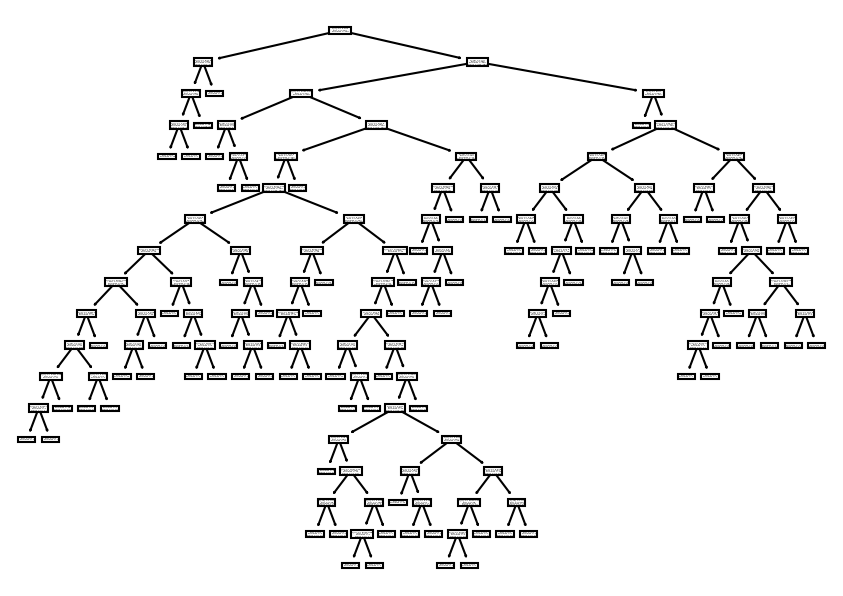

In [190]:
plt.figure(figsize=(7,5),dpi=150)
plot_tree(Dec);

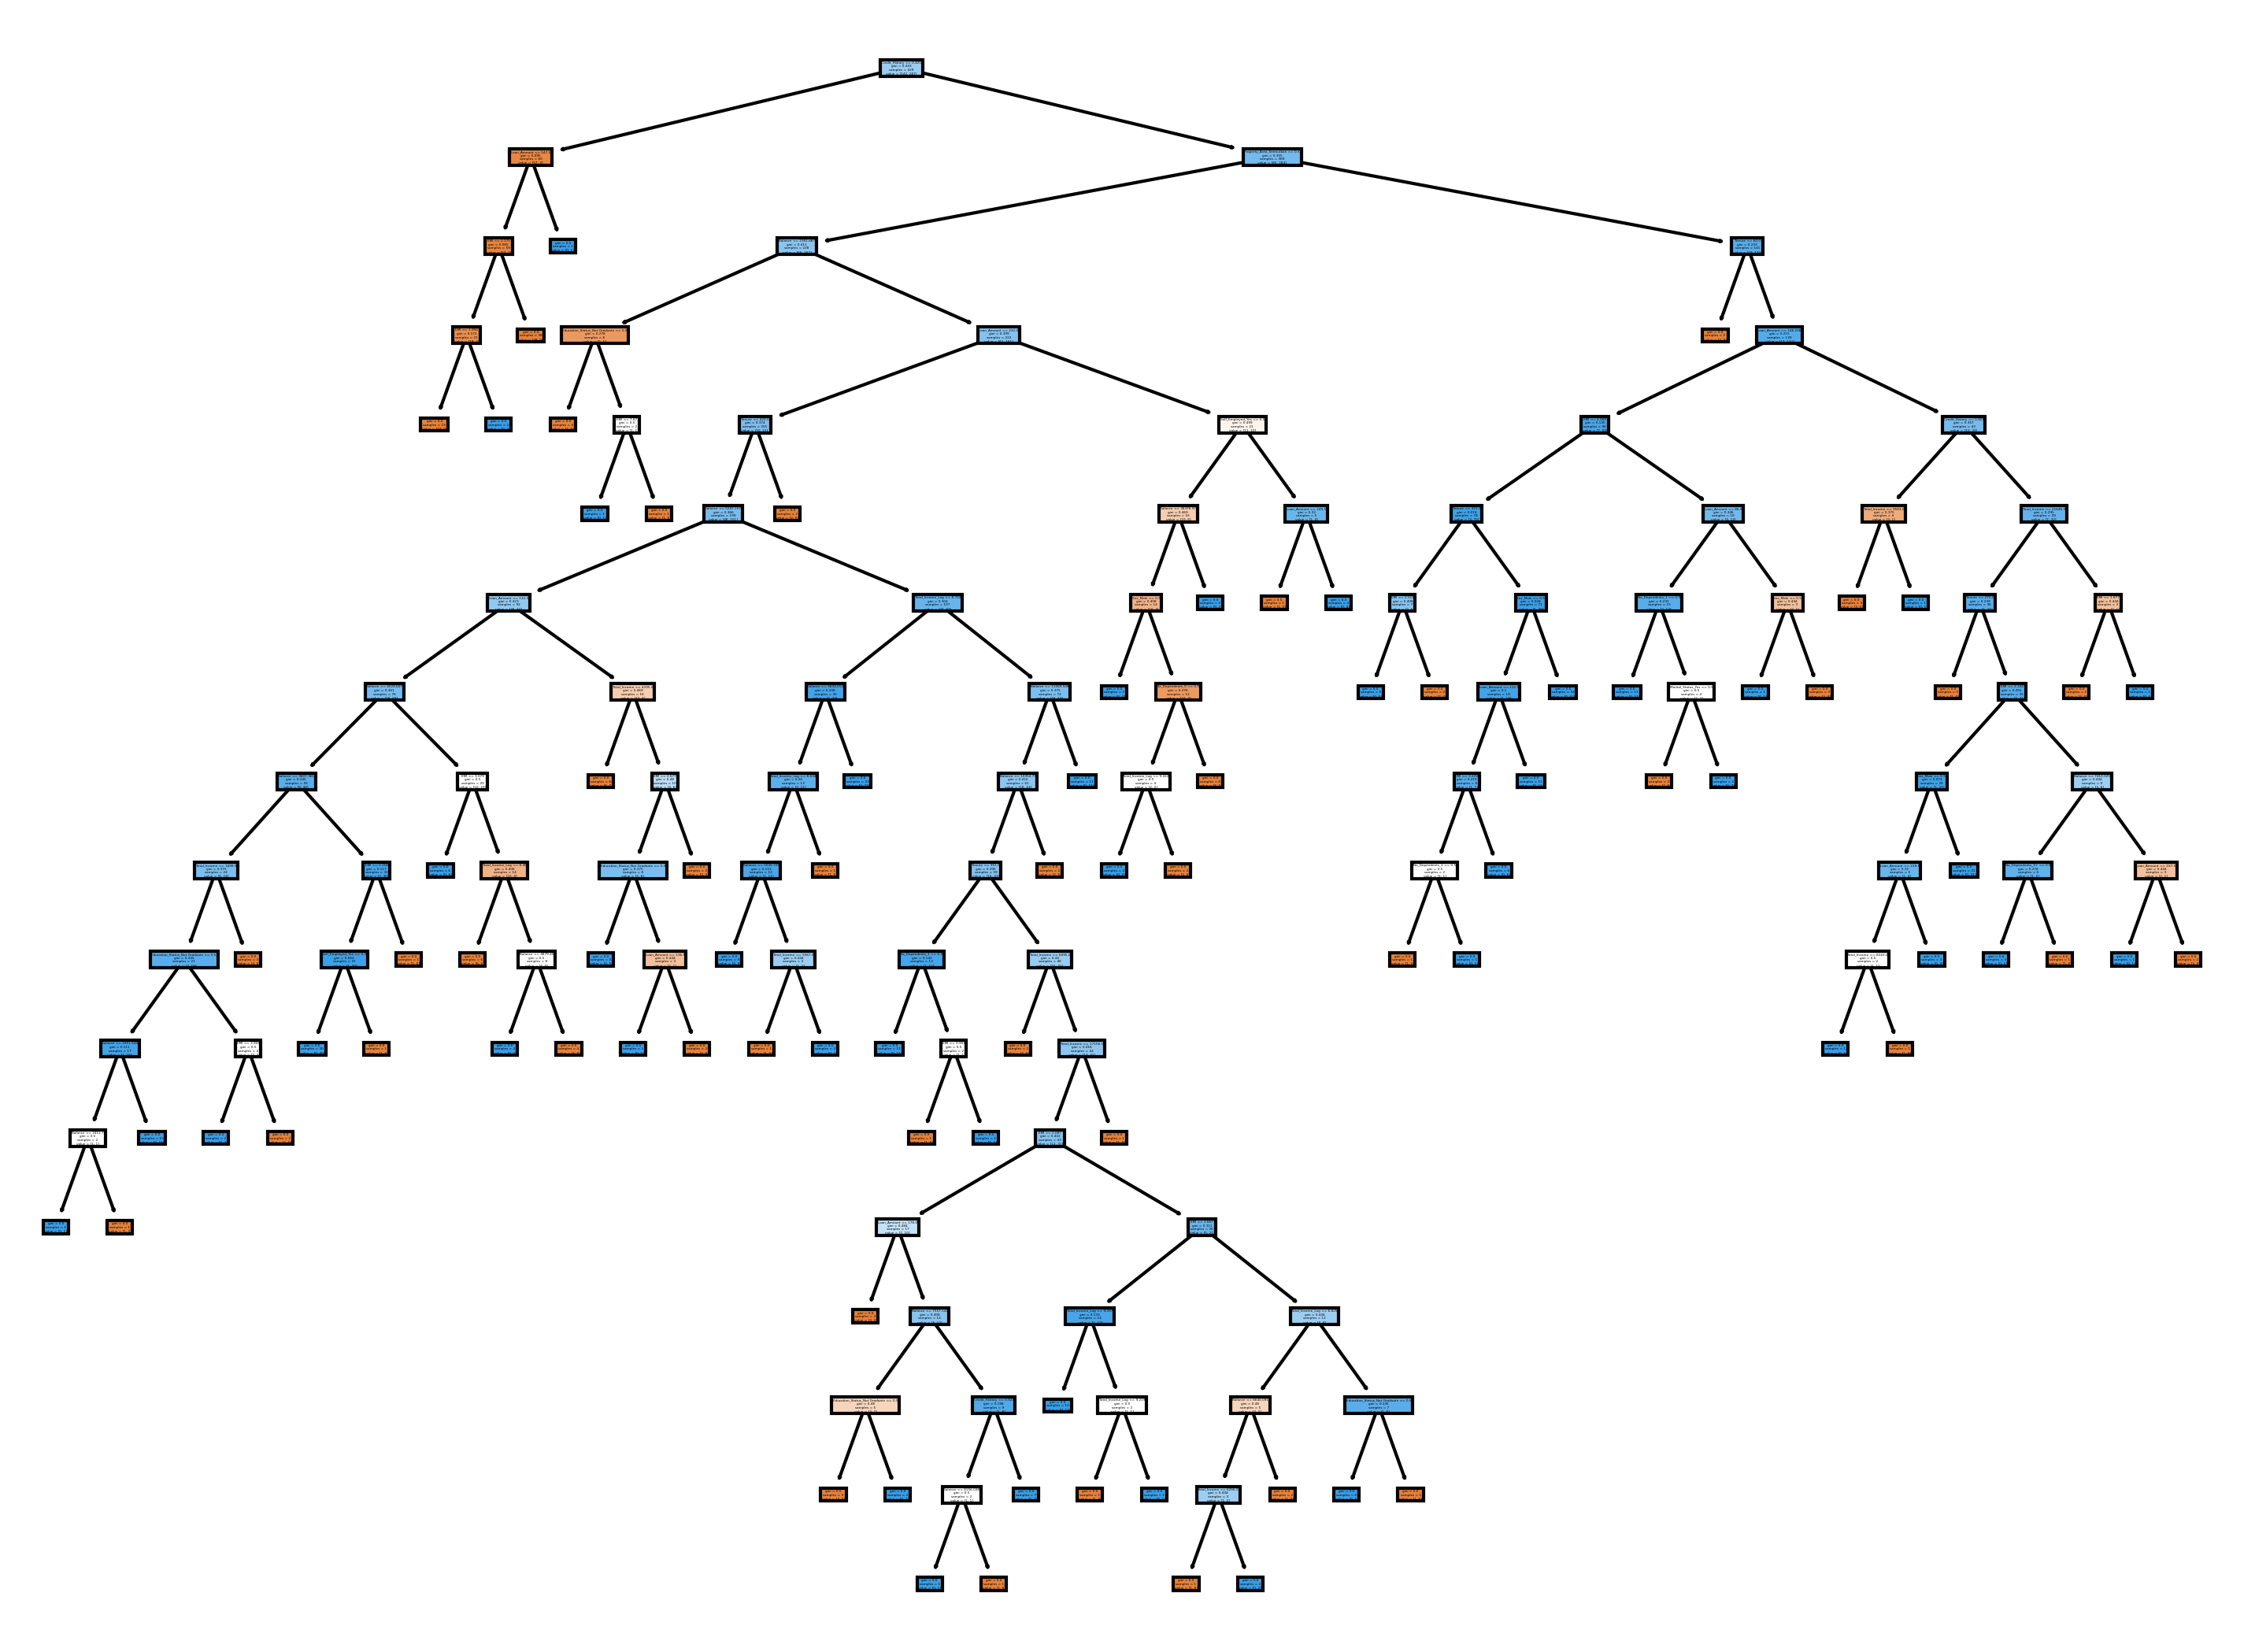

In [191]:
plt.figure(figsize=(12,9),dpi=300)
plot_tree(Dec,filled=True,feature_names=e.columns);

In [192]:
def model(Dec):
    Dec_pred=Dec.predict(e_val)
    print(classification_report(f_val,Dec_pred))
    print('/n')
    plt.figure(figsize=(12,9),dpi=300)
    plot_tree(Dec,filled=True,feature_names=e.columns);

In [193]:
Dec2=DecisionTreeClassifier(max_depth=2)
Dec2.fit(e_train,f_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

           N       0.86      0.50      0.63        50
           Y       0.84      0.97      0.90       135

    accuracy                           0.84       185
   macro avg       0.85      0.74      0.77       185
weighted avg       0.85      0.84      0.83       185

/n


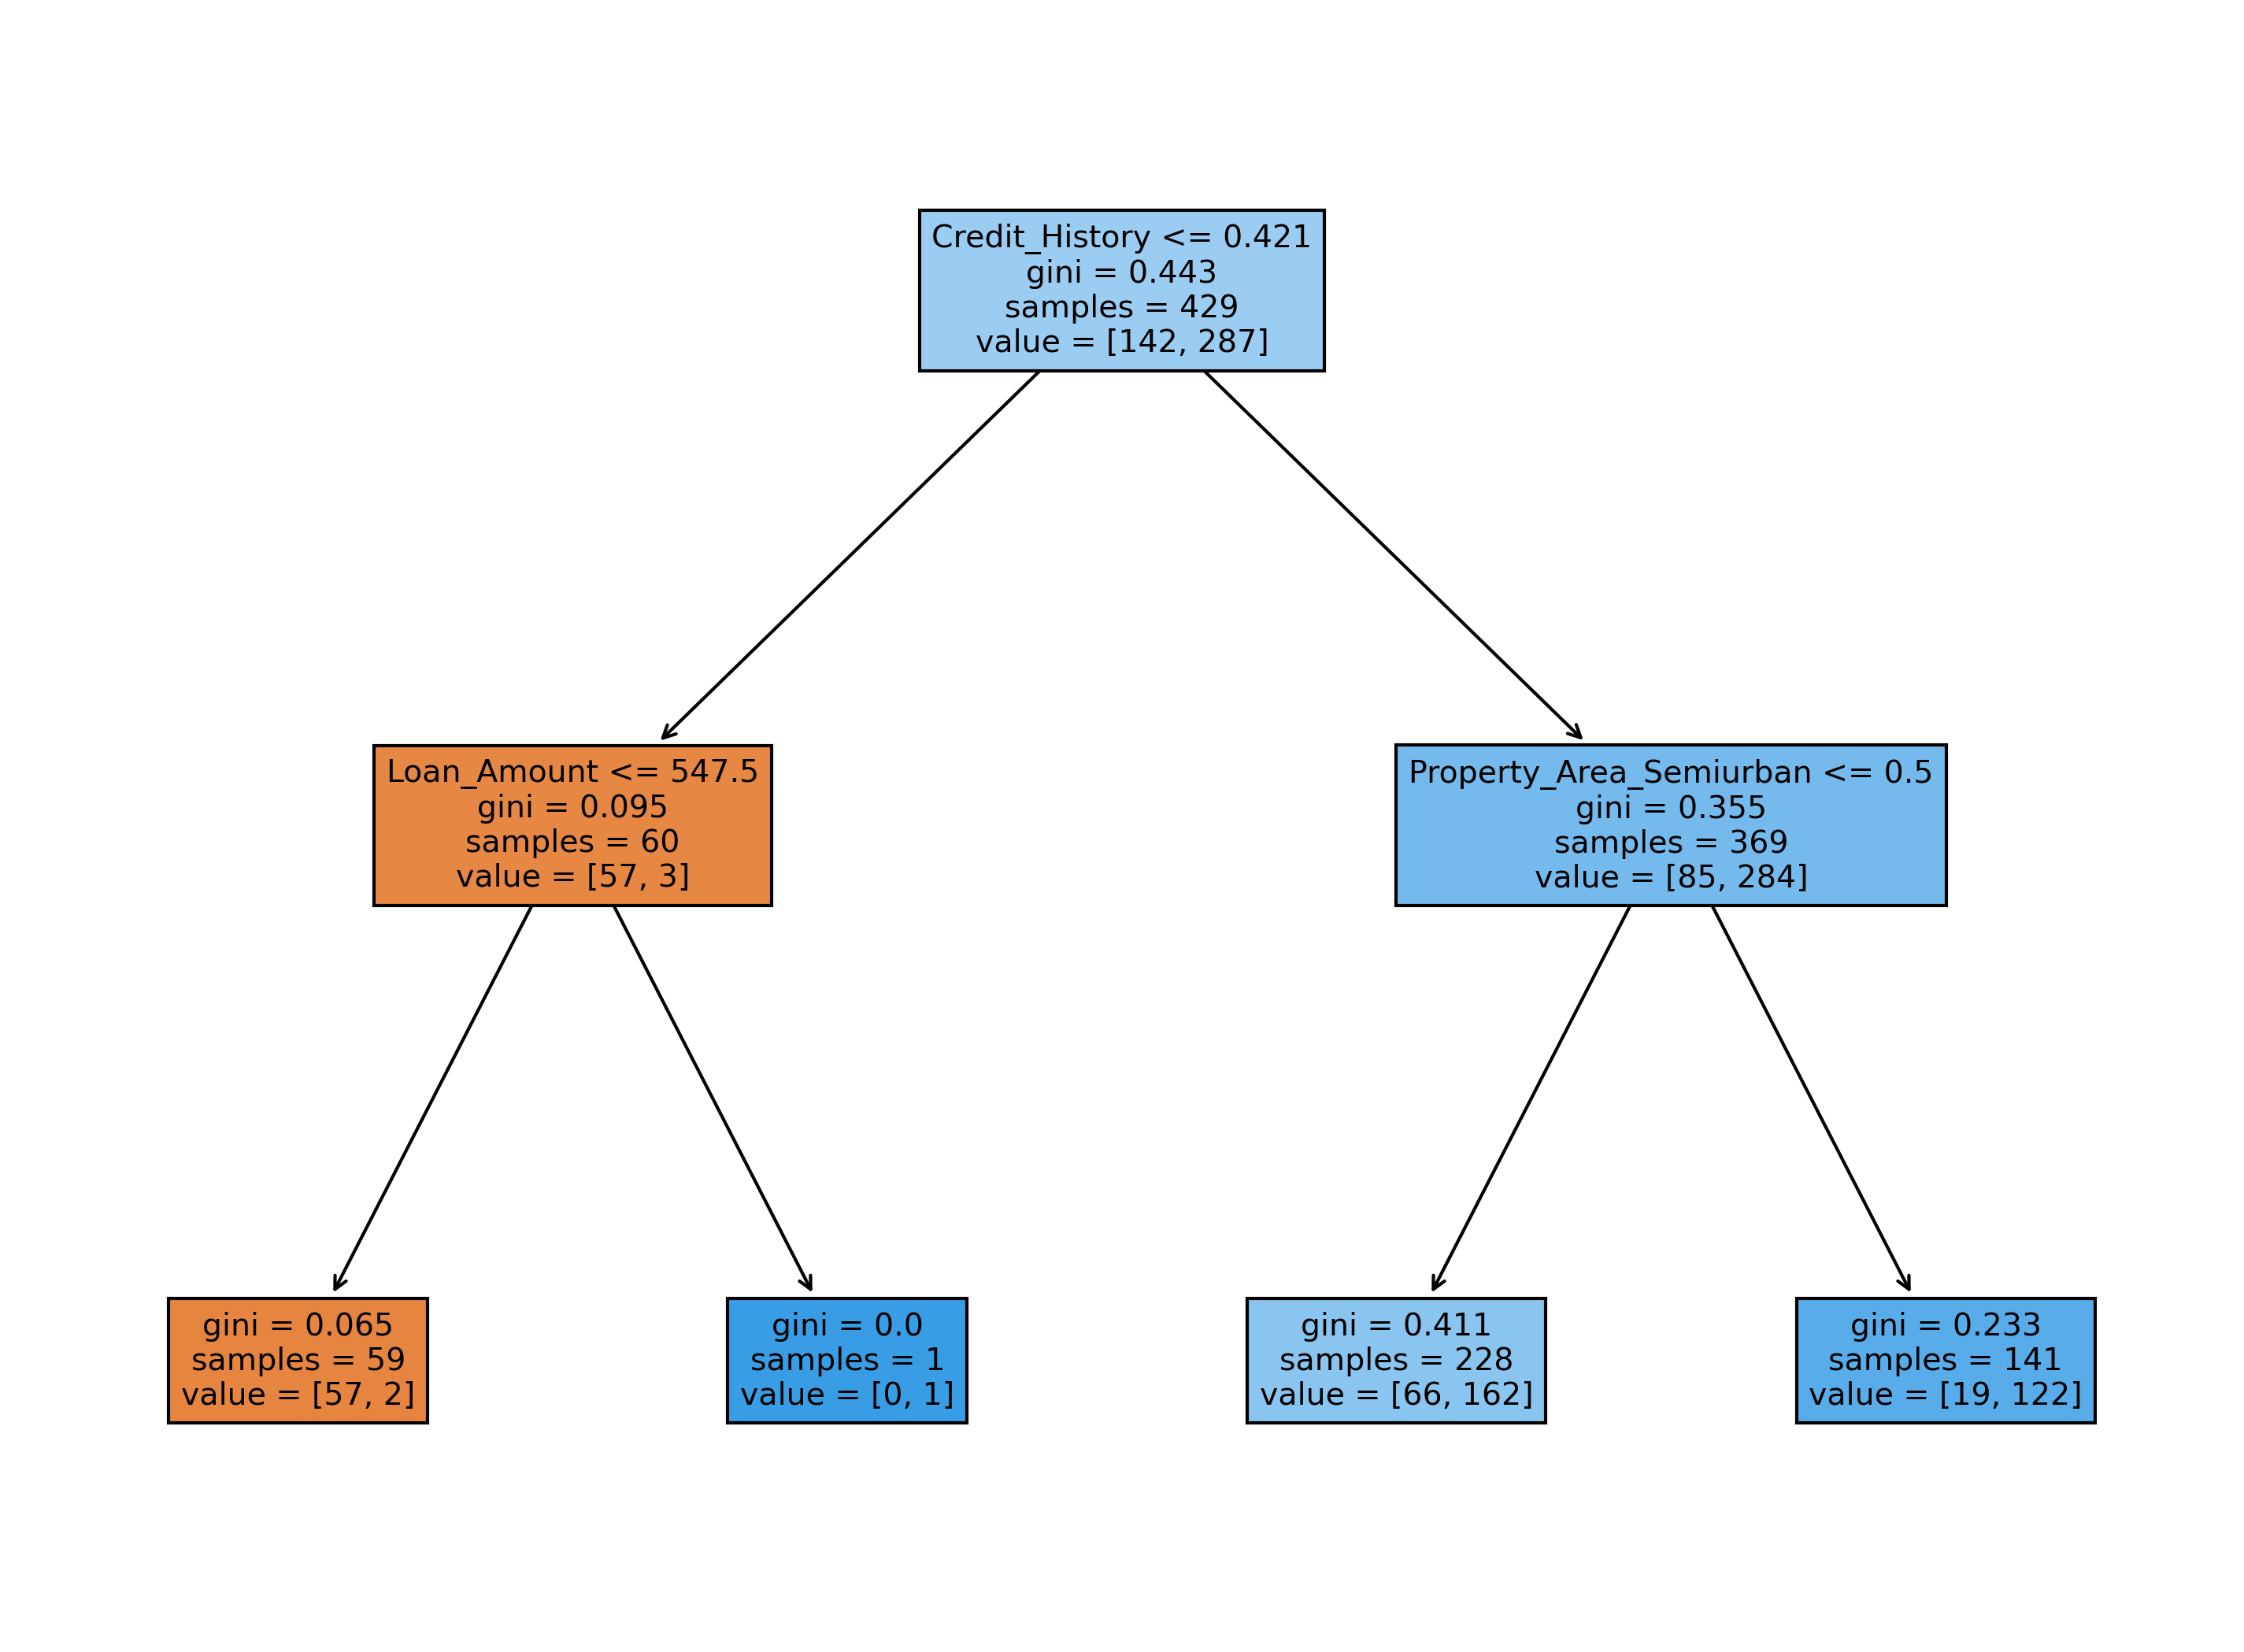

In [194]:
model(Dec2)

In [195]:
Dec3=DecisionTreeClassifier(max_depth=5,max_features=3,max_leaf_nodes=3)
Dec3.fit(e_train,f_train)

DecisionTreeClassifier(max_depth=5, max_features=3, max_leaf_nodes=3)

              precision    recall  f1-score   support

           N       0.13      0.04      0.06        50
           Y       0.72      0.90      0.80       135

    accuracy                           0.67       185
   macro avg       0.43      0.47      0.43       185
weighted avg       0.56      0.67      0.60       185

/n


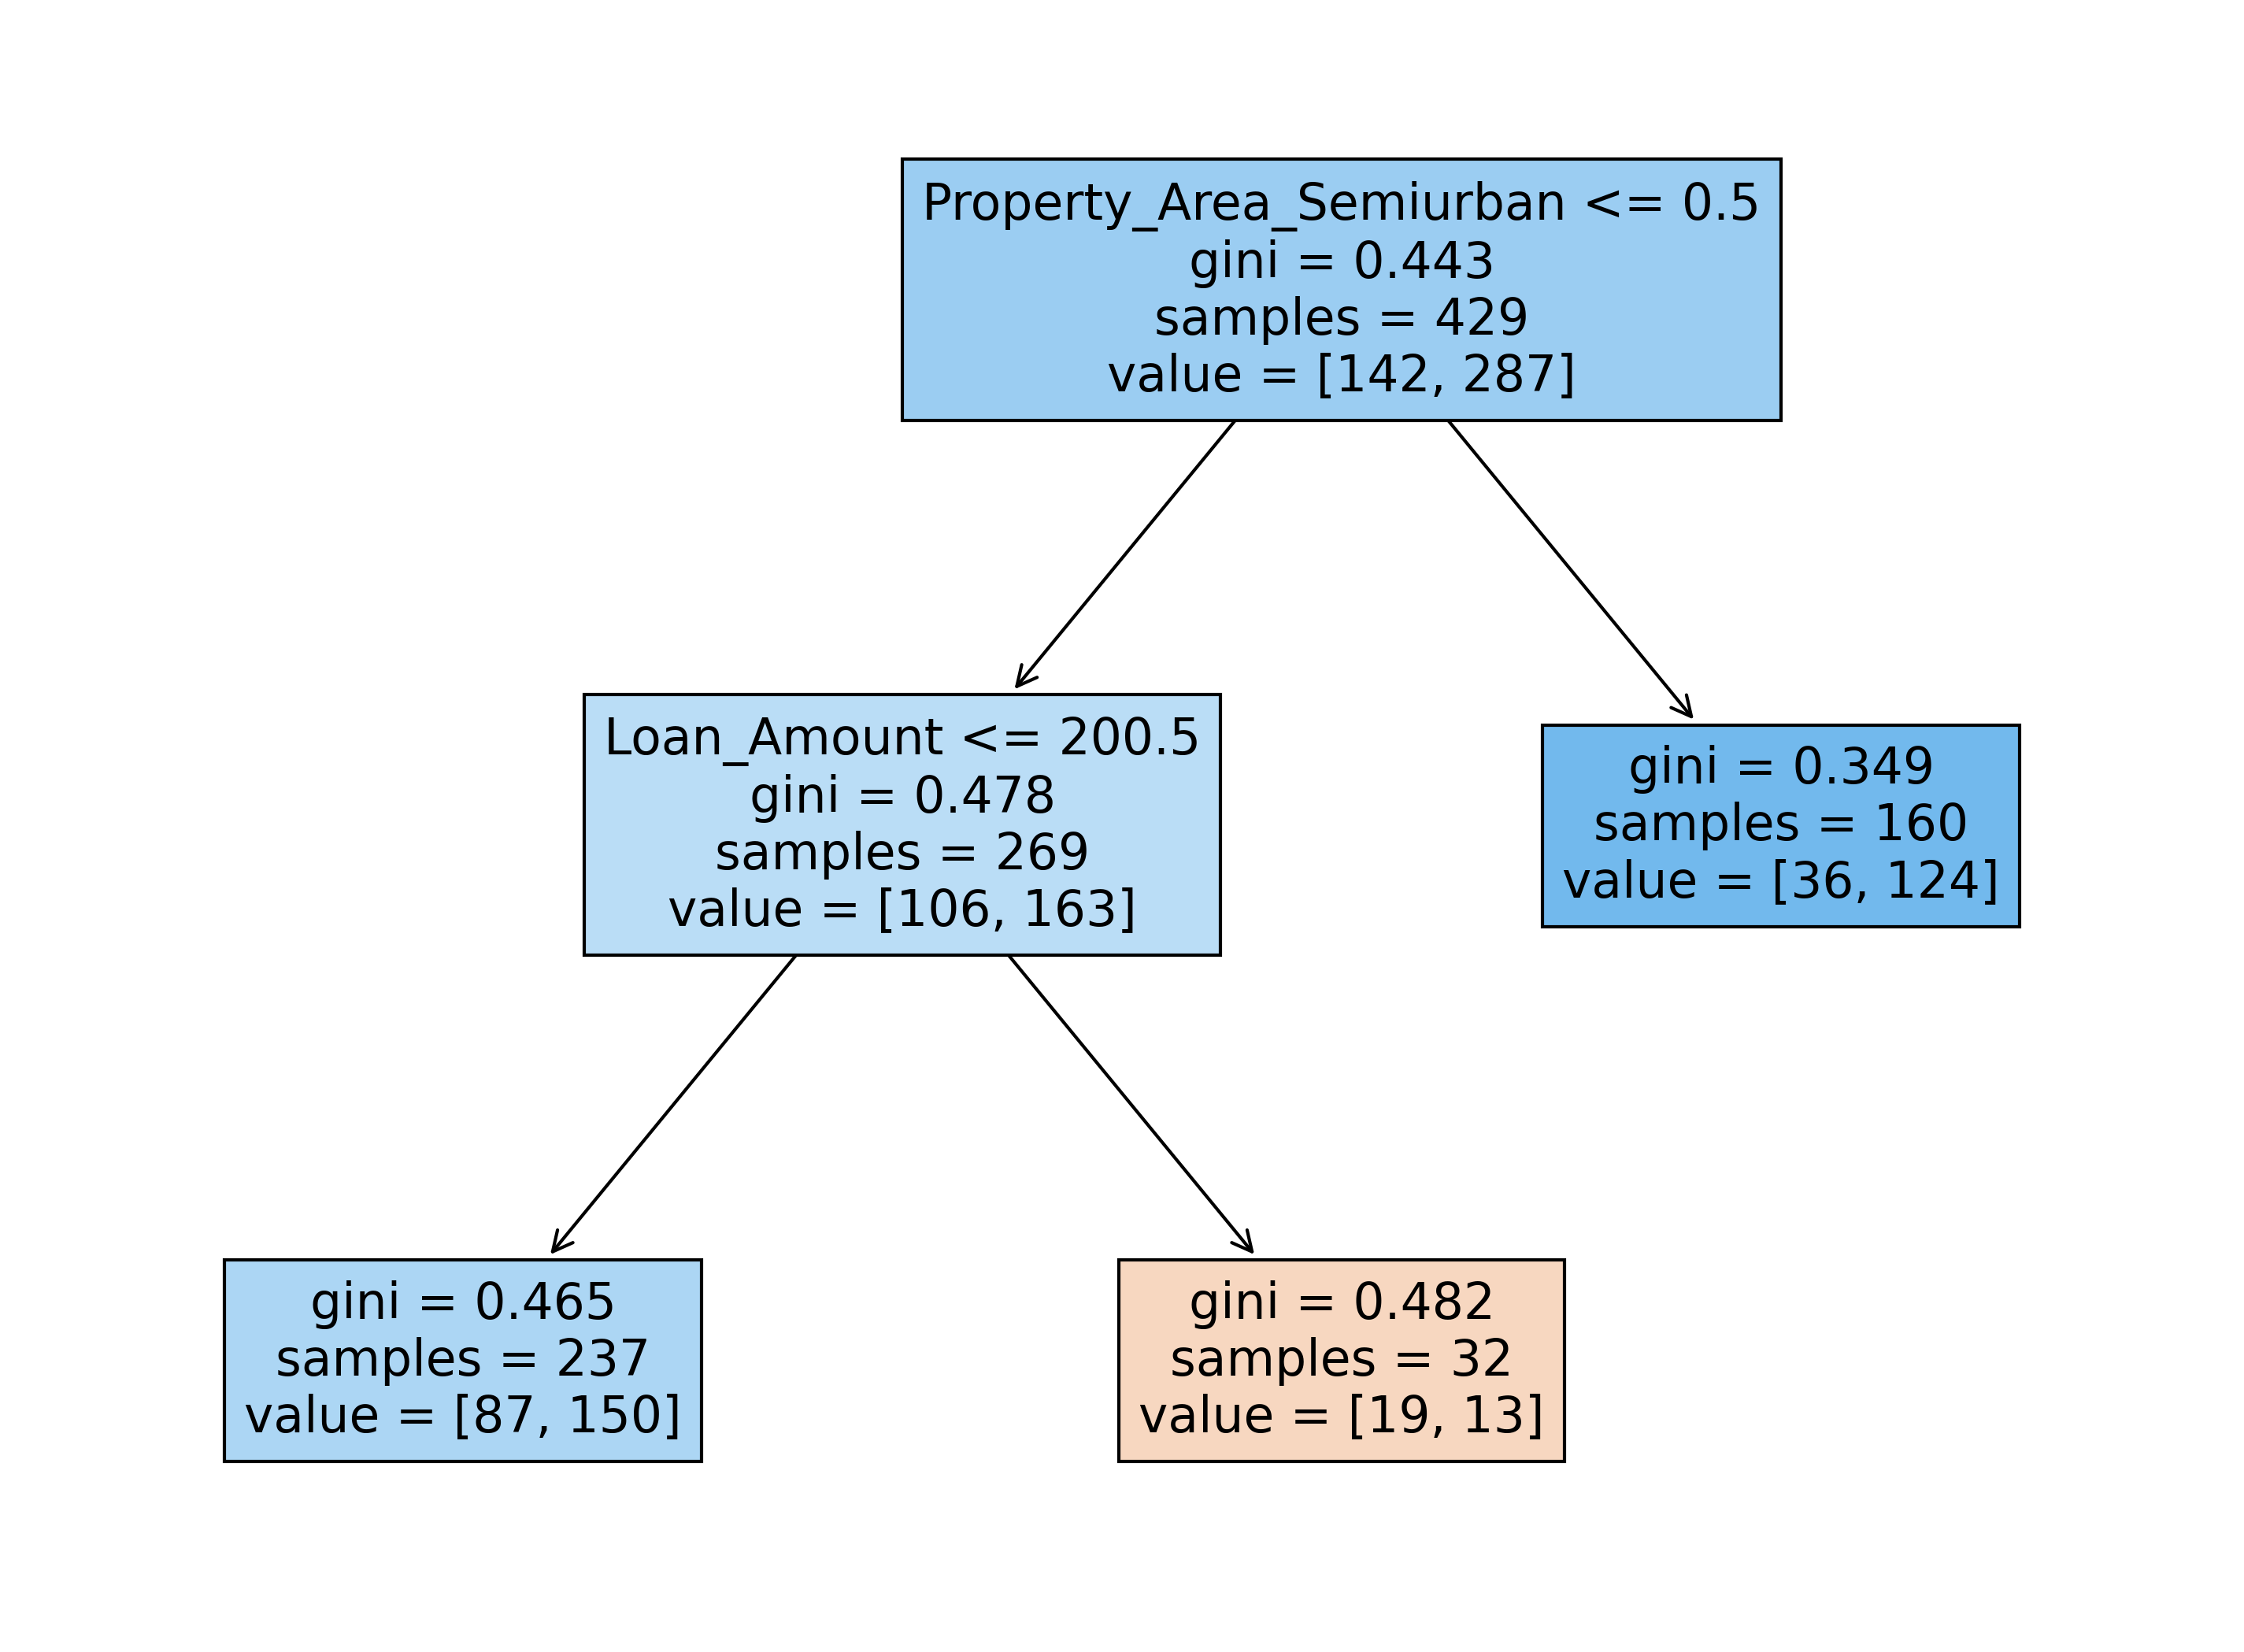

In [196]:
model(Dec3)

# Random Forest

In [197]:
Loan.head()

,Loan_ID,Sex,Marital_Status,No_Dependents,Education_Status,Self_Employed,Loan_Amount,Tenure,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_Log,EMI,Balance
0,LP001002,Male,No,0,Graduate,No,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,3.004757,7072.616212
1,LP001003,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,N,6091.0,8.714568,2.812500,6088.187500
2,LP001005,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,5.454545,2994.545455
3,LP001006,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,Y,4941.0,8.505323,3.000000,4938.000000
4,LP001008,Male,No,0,Graduate,No,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,2.553191,5997.446809


In [198]:
Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Loan_ID           614 non-null    object 
 1   Sex               614 non-null    object 
 2   Marital_Status    614 non-null    object 
 3   No_Dependents     614 non-null    object 
 4   Education_Status  614 non-null    object 
 5   Self_Employed     614 non-null    object 
 6   Loan_Amount       614 non-null    float64
 7   Tenure            614 non-null    float64
 8   Credit_History    614 non-null    float64
 9   Property_Area     614 non-null    object 
 10  Loan_Status       614 non-null    object 
 11  Total_Income      614 non-null    float64
 12  Total_Income_Log  614 non-null    float64
 13  EMI               614 non-null    float64
 14  Balance           614 non-null    float64
dtypes: float64(7), object(8)
memory usage: 72.1+ KB


In [199]:
Loan.columns

Index(['Loan_ID', 'Sex', 'Marital_Status', 'No_Dependents', 'Education_Status',
       'Self_Employed', 'Loan_Amount', 'Tenure', 'Credit_History',
       'Property_Area', 'Loan_Status', 'Total_Income', 'Total_Income_Log',
       'EMI', 'Balance'],
      dtype='object')

In [200]:
Loan.describe()

,Loan_Amount,Tenure,Credit_History,Total_Income,Total_Income_Log,EMI,Balance
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,146.412162,342.000000,0.842199,7024.705081,8.642390,3.004757,7072.616212
std,84.037468,64.372489,0.349681,6458.663872,0.471748,2.171744,6401.430983
min,9.000000,12.000000,0.000000,1442.000000,7.273786,0.108108,1431.714286
25%,100.250000,360.000000,1.000000,4166.000000,8.334712,2.000000,4243.534615
50%,129.000000,360.000000,1.000000,5416.500000,8.597205,2.812500,5559.771144
75%,164.750000,360.000000,1.000000,7521.750000,8.925549,3.428571,7248.195652
max,700.000000,480.000000,1.000000,81000.000000,9.600000,40.000000,80999.000000


In [201]:
i=Loan.drop(['Loan_ID','Loan_Status'],axis=1)

In [202]:
i.head()

,Sex,Marital_Status,No_Dependents,Education_Status,Self_Employed,Loan_Amount,Tenure,Credit_History,Property_Area,Total_Income,Total_Income_Log,EMI,Balance
0,Male,No,0,Graduate,No,146.412162,360.0,1.0,Urban,5849.0,8.674026,3.004757,7072.616212
1,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,6091.0,8.714568,2.812500,6088.187500
2,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,3000.0,8.006368,5.454545,2994.545455
3,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,4941.0,8.505323,3.000000,4938.000000
4,Male,No,0,Graduate,No,141.000000,360.0,1.0,Urban,6000.0,8.699515,2.553191,5997.446809


In [203]:
j=Loan['Loan_Status']

In [204]:
j.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [205]:
i=pd.get_dummies(i,drop_first=True)

In [206]:
i.head()

,Loan_Amount,Tenure,Credit_History,Total_Income,Total_Income_Log,EMI,Balance,Sex_Male,Marital_Status_Yes,No_Dependents_0,No_Dependents_1,No_Dependents_2,No_Dependents_3+,Education_Status_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,146.412162,360.0,1.0,5849.0,8.674026,3.004757,7072.616212,1,0,1,0,0,0,0,0,0,1
1,128.000000,360.0,1.0,6091.0,8.714568,2.812500,6088.187500,1,1,0,1,0,0,0,0,0,0
2,66.000000,360.0,1.0,3000.0,8.006368,5.454545,2994.545455,1,1,1,0,0,0,0,1,0,1
3,120.000000,360.0,1.0,4941.0,8.505323,3.000000,4938.000000,1,1,1,0,0,0,1,0,0,1
4,141.000000,360.0,1.0,6000.0,8.699515,2.553191,5997.446809,1,0,1,0,0,0,0,0,0,1


In [207]:
j.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [208]:
from sklearn.model_selection import train_test_split

In [209]:
i_train,i_val,j_train,j_val=train_test_split(i,j,test_size=0.3,random_state=3)

In [210]:
print(i_train.shape,j_train.shape)

(429, 17) (429,)


In [211]:
print(i_val.shape,j_val.shape)

(185, 17) (185,)


In [212]:
from sklearn.ensemble import RandomForestClassifier

In [213]:
Ran=RandomForestClassifier(n_estimators=100,max_features='auto')

In [214]:
Ran

RandomForestClassifier()

In [215]:
Ran.fit(i_train,j_train)

RandomForestClassifier()

In [216]:
y_pred=Ran.predict(i_val)

In [217]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix

In [218]:
accuracy_score(j_val,y_pred)

0.8324324324324325

In [219]:
print(classification_report(j_val,y_pred))

              precision    recall  f1-score   support

           N       0.68      0.60      0.64        45
           Y       0.88      0.91      0.89       140

    accuracy                           0.83       185
   macro avg       0.78      0.75      0.76       185
weighted avg       0.83      0.83      0.83       185



In [220]:
confusion_matrix(j_val,y_pred)

array([[ 27,  18],
       [ 13, 127]], dtype=int64)

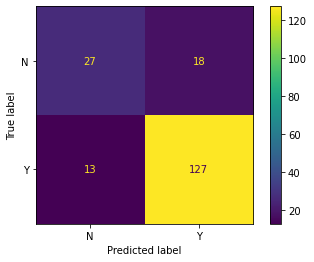

In [221]:
plot_confusion_matrix(Ran,i_val,j_val)

In [222]:
Ran.feature_importances_

array([0.11133405, 0.02943117, 0.25179376, 0.10864273, 0.11916602,
       0.10683144, 0.10805206, 0.01381828, 0.02375223, 0.01745583,
       0.01334146, 0.01018439, 0.01263939, 0.0173457 , 0.0146748 ,
       0.02440197, 0.01713472])

In [223]:
pd.DataFrame(index=i.columns,data=Ran.feature_importances_,columns=['Feature_Importance'])

,Feature_Importance
Loan_Amount,0.111334
Tenure,0.029431
Credit_History,0.251794
Total_Income,0.108643
Total_Income_Log,0.119166
EMI,0.106831
Balance,0.108052
Sex_Male,0.013818
Marital_Status_Yes,0.023752
No_Dependents_0,0.017456


# Choosing Correct Number OF Tree

In [224]:
test_error = []
for i in range(1,50):
    model=RandomForestClassifier(n_estimators=i,max_features='auto')
    model.fit(i_train,j_train)
    j_pred=model.predict(i_val)
    test_error.append(1-accuracy_score(j_val,j_pred))

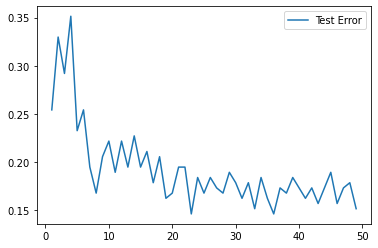

In [225]:
plt.plot(range(1,50),test_error,label='Test Error')
plt.legend()

# Cross Validation

In [226]:
from sklearn.model_selection import GridSearchCV

In [227]:
n_estimators=[64,100,128,200]
max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

In [228]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}

In [229]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

In [230]:
grid.fit(i_train,j_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [231]:
grid.best_params_

{'bootstrap': True, 'max_features': 3, 'n_estimators': 128, 'oob_score': True}

In [232]:
j1_pred=grid.predict(i_val)

In [233]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix

In [234]:
accuracy_score(j_val,j1_pred)

0.8216216216216217

In [235]:
confusion_matrix(j_val,j1_pred)

array([[ 26,  19],
       [ 14, 126]], dtype=int64)

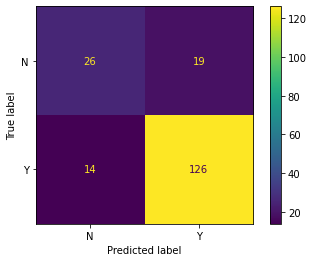

In [236]:
plot_confusion_matrix(grid,i_val,j_val)

In [274]:
print(classification_report(j_val,j1_pred))

              precision    recall  f1-score   support

           N       0.65      0.58      0.61        45
           Y       0.87      0.90      0.88       140

    accuracy                           0.82       185
   macro avg       0.76      0.74      0.75       185
weighted avg       0.82      0.82      0.82       185

